In [ ]:
# modules
import pandas as pd
import json
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

#JSON to DataFrame



In [ ]:
# # mount the colab
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# json to dataframe
data_path = "/content/drive/MyDrive/Soccer_data_raw/soccer/EPL/2018/2781950-2018-08-12.json"

with open(data_path, 'r') as json_file:
    json_data = json.load(json_file)


In [ ]:
json_data

{'info': {'matchId': '2781950',
  'leagueName': 'Premier League',
  'matchDateTime': '2018-08-12T15:00:00.000Z',
  'stadium': {'name': 'Emirates Stadium', 'country': ''}},
 'homeTeam': {'name': 'Arsenal',
  'id': 9825,
  'lineup': [{'id': '30859',
    'position': 'Keeper',
    'localizedPosition': {'label': 'GK', 'key': 'keeper'},
    'name': {'firstName': 'Petr', 'lastName': 'Cech', 'fullName': 'Petr Cech'},
    'role': 'Keeper',
    'stats': {'shotsOnTarget': 0,
     'minutesPlayed': 90,
     'saves': 6,
     'goalsConceded': 2,
     'passesAttempted': 42,
     'passesCompleted': 31,
     'longBallsAttempted': 17,
     'longBallsCompleted': 7,
     'keeperDivingSave': 5,
     'savesInsideBox': 4,
     'keeperSweeper': 0,
     'punches': 0,
     'playerThrows': 6,
     'keeperHighClaim': 0,
     'recoveries': 9,
     'touches': 56}},
   {'id': '427438',
    'position': 'Defender',
    'localizedPosition': {'label': 'RB', 'key': 'rightback_short'},
    'name': {'firstName': 'Hector',
 

In [ ]:
json_data['homeTeam'].keys()


dict_keys(['name', 'id', 'lineup', 'bench', 'coach', 'stats'])

In [ ]:
def json_to_dataframe(json_data):
  # homeTeam
  df0 = pd.json_normalize(json_data['homeTeam'],record_path=['lineup'])
  df0.PlayerStatus = 'Player'

  df1 = pd.json_normalize(json_data['homeTeam'],record_path=['bench'])
  df1.PlayerStatus = 'Bench'

  result_df = pd.concat([df0, df1], axis=0, ignore_index=True)
  # matchId
  result_df['match.id'] = json_data['info']['matchId']
  # league name
  result_df['leagueName'] = json_data['info']['leagueName']
  # stadium
  result_df['stadium'] = json_data['info']['stadium']['name']
  result_df['match_datetime'] = json_data['info']['matchDateTime']
  # team
  result_df['team.name'] = json_data['homeTeam']['name']
  # team
  result_df['team.id'] = json_data['homeTeam']['id']
  result_df['team.type'] = 'homeTeam'

  #awayTeam
  df2 = pd.json_normalize(json_data['awayTeam'],record_path=['lineup'])
  df2.PlayerStatus = 'Player'

  df3 = pd.json_normalize(json_data['awayTeam'],record_path=['bench'])
  df3.PlayerStatus = 'Bench'

  result_df_away = pd.concat([df2, df3], axis=0, ignore_index=True)
  # matchId
  result_df_away['match.id'] = json_data['info']['matchId']
  # league name
  result_df_away['leagueName'] = json_data['info']['leagueName']
  # stadium
  result_df_away['stadium'] = json_data['info']['stadium']['name']
  result_df_away['match_datetime'] = json_data['info']['matchDateTime']
  # team
  result_df_away['team.name'] = json_data['awayTeam']['name']
  # team
  result_df_away['team.id'] = json_data['awayTeam']['id']
  result_df_away['team.type'] = 'awayTeam'

  final_df = pd.concat([result_df, result_df_away], axis=0, ignore_index=True)

#   desired_order = [
#     'match.id', 'leagueName', 'stadium', 'team.name', 'team.id',
#     'name.firstName', 'name.lastName', 'name.fullName', 'id', 'position', 'role',
#     'localizedPosition.label', 'localizedPosition.key', 'stats.shotsOnTarget',
#     'stats.minutesPlayed', 'stats.saves', 'stats.goalsConceded', 'stats.passesAttempted',
#     'stats.passesCompleted', 'stats.longBallsAttempted', 'stats.longBallsCompleted',
#     'stats.keeperDivingSave', 'stats.savesInsideBox', 'stats.keeperSweeper',
#     'stats.punches', 'stats.playerThrows', 'stats.keeperHighClaim', 'stats.recoveries',
#     'stats.touches', 'stats.goals', 'stats.assists', 'stats.totalShots', 'stats.chancesCreated',
#     'stats.dribblesAttempted', 'stats.dribblesCompleted', 'stats.dispossessed', 'stats.tacklesAttempted',
#     'stats.tacklesCompleted', 'stats.shotBlocks', 'stats.clearances', 'stats.headedClearance',
#     'stats.interceptions', 'stats.groundDuelsAttempted', 'stats.groundDuelsCompleted',
#     'stats.aerialsAttempted', 'stats.aerialsCompleted', 'stats.wasFouled', 'stats.fouls',
#     'stats.passesIntoFinalThird', 'stats.dribbledPast', 'stats.crossesAttempted', 'stats.crossesCompleted',
#     'stats.corners', 'stats.offsides', 'stats.blockedShots', 'localizedPosition', 'stats.bigChanceMissedTitle'
# ]
#   final_df = final_df[desired_order]
  return final_df

In [ ]:
x = json_to_dataframe(json_data)

In [ ]:
x.shape

(36, 59)

In [ ]:
x

,id,position,role,localizedPosition.label,localizedPosition.key,name.firstName,name.lastName,name.fullName,stats.shotsOnTarget,stats.minutesPlayed,...,stats.blockedShots,localizedPosition,stats.bigChanceMissedTitle,match.id,leagueName,stadium,match_datetime,team.name,team.id,team.type
0,30859,Keeper,Keeper,GK,keeper,Petr,Cech,Petr Cech,0,90.0,...,NaN,NaN,NaN,2781950,Premier League,Emirates Stadium,2018-08-12T15:00:00.000Z,Arsenal,9825,homeTeam
1,427438,Defender,Defender,RB,rightback_short,Hector,Bellerin,Hector Bellerin,1,90.0,...,NaN,NaN,NaN,2781950,Premier League,Emirates Stadium,2018-08-12T15:00:00.000Z,Arsenal,9825,homeTeam
2,184999,Defender,Defender,CB,centerback_short,Shkodran,Mustafi,Shkodran Mustafi,1,90.0,...,NaN,NaN,NaN,2781950,Premier League,Emirates Stadium,2018-08-12T15:00:00.000Z,Arsenal,9825,homeTeam
3,39455,Defender,Defender,CB,centerback_short,Sokratis,Papastathopoulos,Sokratis Papastathopoulos,0,90.0,...,NaN,NaN,NaN,2781950,Premier League,Emirates Stadium,2018-08-12T15:00:00.000Z,Arsenal,9825,homeTeam
4,604089,Defender,Defender,LB,leftback_short,Ainsley,Maitland-Niles,Ainsley Maitland-Niles,0,35.0,...,NaN,NaN,NaN,2781950,Premier League,Emirates Stadium,2018-08-12T15:00:00.000Z,Arsenal,9825,homeTeam
5,800609,Midfielder,Midfielder,DM,centerdefensivemidfielder_short,Matteo,Guendouzi,Matteo Guendouzi,0,90.0,...,NaN,NaN,NaN,2781950,Premier League,Emirates Stadium,2018-08-12T15:00:00.000Z,Arsenal,9825,homeTeam
6,207236,Midfielder,Midfielder,DM,centerdefensivemidfielder_short,Granit,Xhaka,Granit Xhaka,0,70.0,...,NaN,NaN,NaN,2781950,Premier League,Emirates Stadium,2018-08-12T15:00:00.000Z,Arsenal,9825,homeTeam
7,36378,Midfielder,Midfielder,RW,rightwinger_short,Mesut,Özil,Mesut Özil,0,90.0,...,NaN,NaN,NaN,2781950,Premier League,Emirates Stadium,2018-08-12T15:00:00.000Z,Arsenal,9825,homeTeam
8,75489,Midfielder,Midfielder,AM,centerattackingmidfielder_short,Aaron,Ramsey,Aaron Ramsey,1,54.0,...,NaN,NaN,NaN,2781950,Premier League,Emirates Stadium,2018-08-12T15:00:00.000Z,Arsenal,9825,homeTeam
9,73167,Midfielder,Midfielder,LW,leftwinger_short,Henrikh,Mkhitaryan,Henrikh Mkhitaryan,0,90.0,...,2.0,NaN,NaN,2781950,Premier League,Emirates Stadium,2018-08-12T15:00:00.000Z,Arsenal,9825,homeTeam


In [ ]:
#concatinatin all json's into dataframe and merging all dataframes
def concat_json_files_in_folders(folder_path, years, file_extensions=['json']):
    result_dfs = []  # To store DataFrames from each JSON file

    for year in years:
        year_folder_path = os.path.join(folder_path, str(year))
        print(year_folder_path)

        # Check if the year folder exists
        if os.path.exists(year_folder_path) and os.path.isdir(year_folder_path):
            for file_extension in file_extensions:
                json_files = glob.glob(os.path.join(year_folder_path, f"*.{file_extension}"))
                # Create an empty DataFrame to store data for the current year
                year_df = pd.DataFrame()

                # Loop through JSON files in the year folder
                for json_file in json_files:
                  with open(json_file, 'r') as json_file_data:
                    json_data = json.load(json_file_data)
                    df = json_to_dataframe(json_data)
                    year_df = pd.concat([year_df, df], ignore_index=True)

                # Append the DataFrame for the current year to the result_dfs list
                result_dfs.append(year_df)

    # Concatenate the DataFrames from different years into a single DataFrame
    final_result_df = pd.concat(result_dfs, axis=0, ignore_index=True)

    #final_result_df = final_result_df[desired_order]

    return final_result_df


In [ ]:
year_folder_path = "/content/drive/MyDrive/Soccer_data_raw/soccer/EPL"
years = [2016,2017, 2018, 2019, 2020, 2021]

In [ ]:
result_df = concat_json_files_in_folders(year_folder_path, years)

/content/drive/MyDrive/Soccer_data_raw/soccer/EPL/2016
/content/drive/MyDrive/Soccer_data_raw/soccer/EPL/2017
/content/drive/MyDrive/Soccer_data_raw/soccer/EPL/2018
/content/drive/MyDrive/Soccer_data_raw/soccer/EPL/2019
/content/drive/MyDrive/Soccer_data_raw/soccer/EPL/2020
/content/drive/MyDrive/Soccer_data_raw/soccer/EPL/2021


In [ ]:
len(result_df.columns)

70

In [ ]:
result_df

,id,position,role,localizedPosition.label,localizedPosition.key,name.firstName,name.lastName,name.fullName,stats.shotsOnTarget,stats.minutesPlayed,...,stats.missedPenalty,stats.concededPenalties,stats.savedPenalties,stats.owngoal,stats.errorLedToGoal,stats.errorsLedToGoal,stats.clearanceOffTheLine,stats.lastManTackle,stats.penaltyGoalsConceded,stats.crosses
0,37770,Keeper,Keeper,GK,keeper,Kasper,Schmeichel,Kasper Schmeichel,0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,23571,Defender,Defender,CB,centerback_short,Wes,Morgan,Wes Morgan,0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,38899,Defender,Defender,CB,centerback_short,Robert,Huth,Robert Huth,0,60.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,43061,Defender,Defender,CB,centerback_short,Christian,Fuchs,Christian Fuchs,1,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,139671,Midfielder,Attacker,RM,rightmidfielder_short,Marc,Albrighton,Marc Albrighton,0,77.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84863,820024,Substitute,Midfielder,NaN,NaN,Sean,Longstaff,Sean Longstaff,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84864,189982,Substitute,Defender,NaN,NaN,Fabian,Schär,Fabian Schär,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84865,864983,Substitute,Defender,NaN,NaN,Jamal,Lewis,Jamal Lewis,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84866,299984,Substitute,Defender,NaN,NaN,Javier,Manquillo,Javier Manquillo,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
result_df.to_csv("soccer_prediction.csv",index=False)

In [ ]:
year_folder_path = "/content/drive/MyDrive/Soccer_data_raw/soccer/EPL"
years = [2022]

In [ ]:
future_df = concat_json_files_in_folders(year_folder_path, years)

/content/drive/MyDrive/Soccer_data_raw/soccer/EPL/2022


In [ ]:
result_df.to_csv("soccer_prediction_holdout.csv",index=False)

#Data Cleaning

In [ ]:
result_df = pd.read_csv("soccer_prediction.csv")

In [ ]:
# filling stats with 0
columns_to_replace = [col for col in result_df.columns if 'stats.' in col]

result_df[columns_to_replace] = result_df[columns_to_replace].fillna(0)


In [ ]:
result_df

,id,position,role,localizedPosition.label,localizedPosition.key,name.firstName,name.lastName,name.fullName,stats.shotsOnTarget,stats.minutesPlayed,...,stats.missedPenalty,stats.concededPenalties,stats.savedPenalties,stats.owngoal,stats.errorLedToGoal,stats.errorsLedToGoal,stats.clearanceOffTheLine,stats.lastManTackle,stats.penaltyGoalsConceded,stats.crosses
0,37770,Keeper,Keeper,GK,keeper,Kasper,Schmeichel,Kasper Schmeichel,0,90.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,23571,Defender,Defender,CB,centerback_short,Wes,Morgan,Wes Morgan,0,90.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,38899,Defender,Defender,CB,centerback_short,Robert,Huth,Robert Huth,0,60.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,43061,Defender,Defender,CB,centerback_short,Christian,Fuchs,Christian Fuchs,1,90.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,139671,Midfielder,Attacker,RM,rightmidfielder_short,Marc,Albrighton,Marc Albrighton,0,77.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84863,820024,Substitute,Midfielder,NaN,NaN,Sean,Longstaff,Sean Longstaff,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84864,189982,Substitute,Defender,NaN,NaN,Fabian,Schär,Fabian Schär,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84865,864983,Substitute,Defender,NaN,NaN,Jamal,Lewis,Jamal Lewis,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84866,299984,Substitute,Defender,NaN,NaN,Javier,Manquillo,Javier Manquillo,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
result_df[['localizedPosition.label','localizedPosition.key']] = result_df[['localizedPosition.label','localizedPosition.key']].fillna('NONE')

In [ ]:
result_df

,id,position,role,localizedPosition.label,localizedPosition.key,name.firstName,name.lastName,name.fullName,stats.shotsOnTarget,stats.minutesPlayed,...,stats.missedPenalty,stats.concededPenalties,stats.savedPenalties,stats.owngoal,stats.errorLedToGoal,stats.errorsLedToGoal,stats.clearanceOffTheLine,stats.lastManTackle,stats.penaltyGoalsConceded,stats.crosses
0,37770,Keeper,Keeper,GK,keeper,Kasper,Schmeichel,Kasper Schmeichel,0,90.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,23571,Defender,Defender,CB,centerback_short,Wes,Morgan,Wes Morgan,0,90.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,38899,Defender,Defender,CB,centerback_short,Robert,Huth,Robert Huth,0,60.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,43061,Defender,Defender,CB,centerback_short,Christian,Fuchs,Christian Fuchs,1,90.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,139671,Midfielder,Attacker,RM,rightmidfielder_short,Marc,Albrighton,Marc Albrighton,0,77.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84863,820024,Substitute,Midfielder,NONE,NONE,Sean,Longstaff,Sean Longstaff,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84864,189982,Substitute,Defender,NONE,NONE,Fabian,Schär,Fabian Schär,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84865,864983,Substitute,Defender,NONE,NONE,Jamal,Lewis,Jamal Lewis,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84866,299984,Substitute,Defender,NONE,NONE,Javier,Manquillo,Javier Manquillo,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
len(result_df['match.id'].unique())

2280

In [ ]:
result_df.isnull().any()

id                            False
position                      False
role                          False
localizedPosition.label       False
localizedPosition.key         False
                              ...  
stats.errorsLedToGoal         False
stats.clearanceOffTheLine     False
stats.lastManTackle           False
stats.penaltyGoalsConceded    False
stats.crosses                 False
Length: 70, dtype: bool

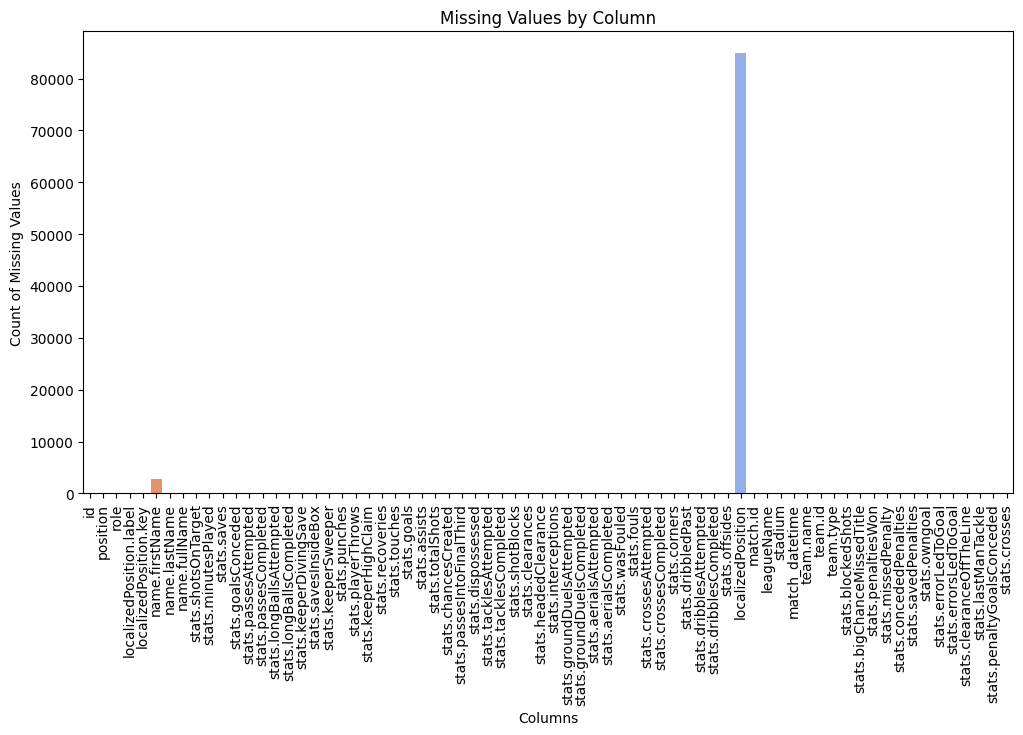

In [ ]:

missing_values = result_df.isnull().sum()
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_values.index, y=missing_values.values)
plt.xticks(rotation=90)
plt.xlabel('Columns')
plt.ylabel('Count of Missing Values')
plt.title('Missing Values by Column')
plt.show()


In [ ]:
result_df.drop(['localizedPosition','name.firstName','name.lastName'],axis=1,inplace=True)

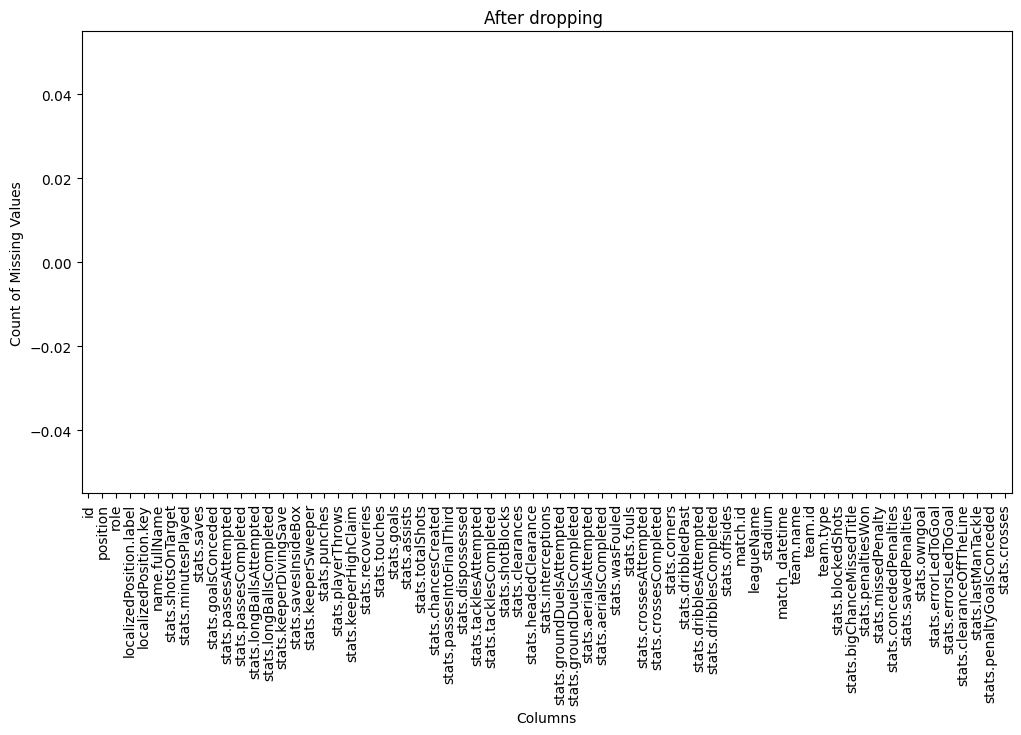

In [ ]:

missing_values = result_df.isnull().sum()
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_values.index, y=missing_values.values)
plt.xticks(rotation=90)
plt.xlabel('Columns')
plt.ylabel('Count of Missing Values')
plt.title('After dropping ')
plt.show()


In [ ]:
result_df['localizedPosition.key'].unique()

array(['keeper', 'centerback_short', 'rightmidfielder_short',
       'centermidfielder_short', 'leftmidfielder_short',
       'centerforward_short', 'NONE', 'leftwinger_short',
       'rightwinger_short', 'rightback_short', 'leftback_short',
       'striker_short', 'centerattackingmidfielder_short',
       'centerdefensivemidfielder_short'], dtype=object)

All null values are removed

In [ ]:
result_df.to_csv("soccer_prediciton_cleaned.csv")

# Data preprocessing


In [ ]:
result_df

,id,position,role,localizedPosition.label,localizedPosition.key,name.fullName,stats.shotsOnTarget,stats.minutesPlayed,stats.saves,stats.goalsConceded,...,stats.missedPenalty,stats.concededPenalties,stats.savedPenalties,stats.owngoal,stats.errorLedToGoal,stats.errorsLedToGoal,stats.clearanceOffTheLine,stats.lastManTackle,stats.penaltyGoalsConceded,stats.crosses
0,37770,Keeper,Keeper,GK,keeper,Kasper Schmeichel,0,90.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,23571,Defender,Defender,CB,centerback_short,Wes Morgan,0,90.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,38899,Defender,Defender,CB,centerback_short,Robert Huth,0,60.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,43061,Defender,Defender,CB,centerback_short,Christian Fuchs,1,90.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,139671,Midfielder,Attacker,RM,rightmidfielder_short,Marc Albrighton,0,77.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84863,820024,Substitute,Midfielder,NONE,NONE,Sean Longstaff,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84864,189982,Substitute,Defender,NONE,NONE,Fabian Schär,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84865,864983,Substitute,Defender,NONE,NONE,Jamal Lewis,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84866,299984,Substitute,Defender,NONE,NONE,Javier Manquillo,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
result_df.columns

Index(['id', 'position', 'role', 'localizedPosition.label',
       'localizedPosition.key', 'name.fullName', 'stats.shotsOnTarget',
       'stats.minutesPlayed', 'stats.saves', 'stats.goalsConceded',
       'stats.passesAttempted', 'stats.passesCompleted',
       'stats.longBallsAttempted', 'stats.longBallsCompleted',
       'stats.keeperDivingSave', 'stats.savesInsideBox', 'stats.keeperSweeper',
       'stats.punches', 'stats.playerThrows', 'stats.keeperHighClaim',
       'stats.recoveries', 'stats.touches', 'stats.goals', 'stats.assists',
       'stats.totalShots', 'stats.chancesCreated',
       'stats.passesIntoFinalThird', 'stats.dispossessed',
       'stats.tacklesAttempted', 'stats.tacklesCompleted', 'stats.shotBlocks',
       'stats.clearances', 'stats.headedClearance', 'stats.interceptions',
       'stats.groundDuelsAttempted', 'stats.groundDuelsCompleted',
       'stats.aerialsAttempted', 'stats.aerialsCompleted', 'stats.wasFouled',
       'stats.fouls', 'stats.crossesAttempte

In [ ]:
#categorical : position,role, localizedPosition.label,localizedPosition.key
result_df.drop(['localizedPosition.label'],axis=1,inplace=True)

In [ ]:
result_df.columns

Index(['id', 'position', 'role', 'localizedPosition.key', 'name.fullName',
       'stats.shotsOnTarget', 'stats.minutesPlayed', 'stats.saves',
       'stats.goalsConceded', 'stats.passesAttempted', 'stats.passesCompleted',
       'stats.longBallsAttempted', 'stats.longBallsCompleted',
       'stats.keeperDivingSave', 'stats.savesInsideBox', 'stats.keeperSweeper',
       'stats.punches', 'stats.playerThrows', 'stats.keeperHighClaim',
       'stats.recoveries', 'stats.touches', 'stats.goals', 'stats.assists',
       'stats.totalShots', 'stats.chancesCreated',
       'stats.passesIntoFinalThird', 'stats.dispossessed',
       'stats.tacklesAttempted', 'stats.tacklesCompleted', 'stats.shotBlocks',
       'stats.clearances', 'stats.headedClearance', 'stats.interceptions',
       'stats.groundDuelsAttempted', 'stats.groundDuelsCompleted',
       'stats.aerialsAttempted', 'stats.aerialsCompleted', 'stats.wasFouled',
       'stats.fouls', 'stats.crossesAttempted', 'stats.crossesCompleted',
    

In [ ]:
df = pd.get_dummies(result_df,columns=['position','role','localizedPosition.key'])

In [ ]:
df

,id,name.fullName,stats.shotsOnTarget,stats.minutesPlayed,stats.saves,stats.goalsConceded,stats.passesAttempted,stats.passesCompleted,stats.longBallsAttempted,stats.longBallsCompleted,...,localizedPosition.key_centerforward_short,localizedPosition.key_centermidfielder_short,localizedPosition.key_keeper,localizedPosition.key_leftback_short,localizedPosition.key_leftmidfielder_short,localizedPosition.key_leftwinger_short,localizedPosition.key_rightback_short,localizedPosition.key_rightmidfielder_short,localizedPosition.key_rightwinger_short,localizedPosition.key_striker_short
0,37770,Kasper Schmeichel,0,90.0,0.0,3.0,26.0,11.0,25.0,10.0,...,0,0,1,0,0,0,0,0,0,0
1,23571,Wes Morgan,0,90.0,0.0,0.0,32.0,25.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
2,38899,Robert Huth,0,60.0,0.0,0.0,17.0,13.0,4.0,2.0,...,0,0,0,0,0,0,0,0,0,0
3,43061,Christian Fuchs,1,90.0,0.0,0.0,37.0,25.0,7.0,4.0,...,0,0,0,0,0,0,0,0,0,0
4,139671,Marc Albrighton,0,77.0,0.0,0.0,35.0,15.0,13.0,1.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84863,820024,Sean Longstaff,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
84864,189982,Fabian Schär,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
84865,864983,Jamal Lewis,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
84866,299984,Javier Manquillo,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


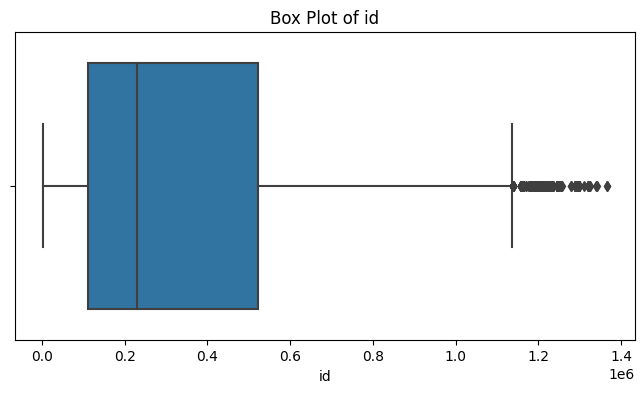

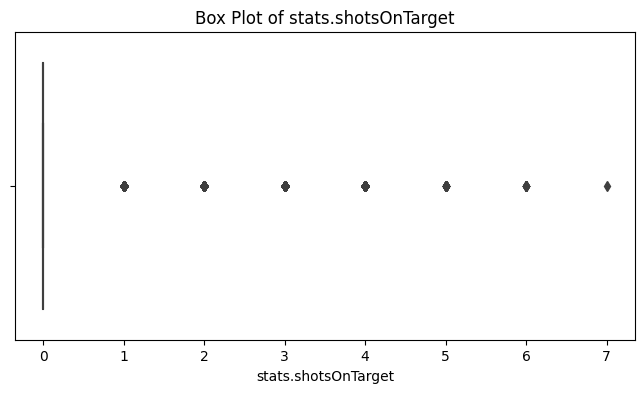

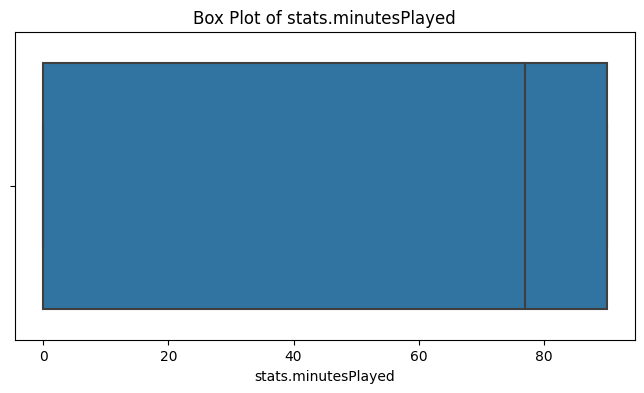

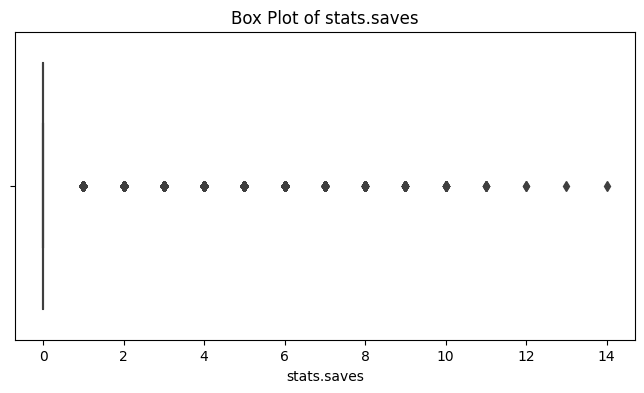

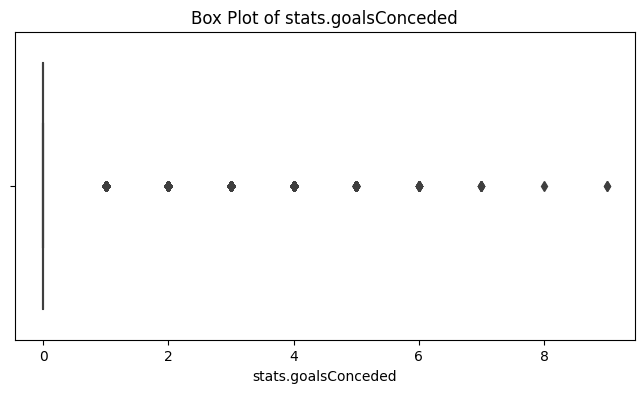

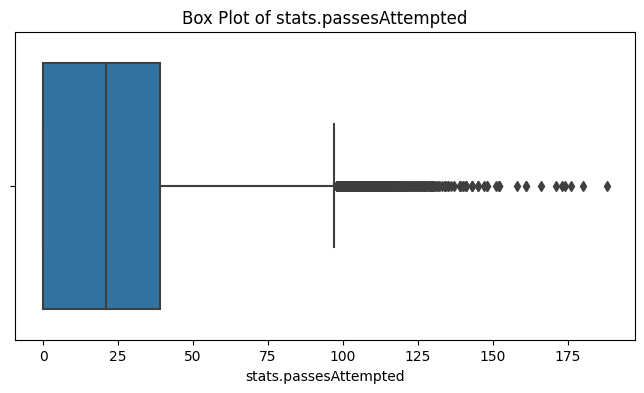

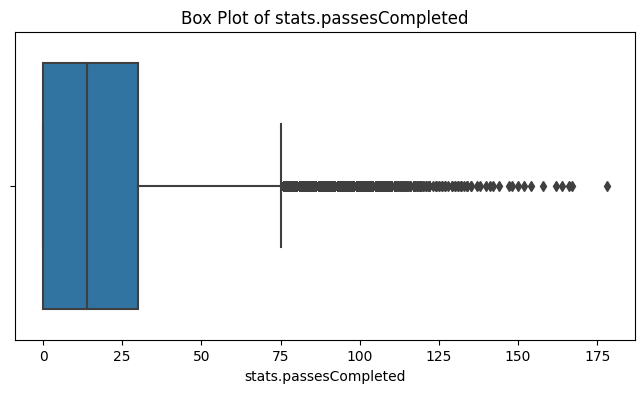

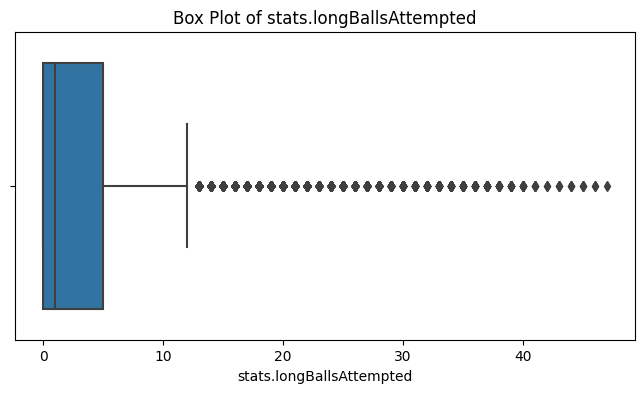

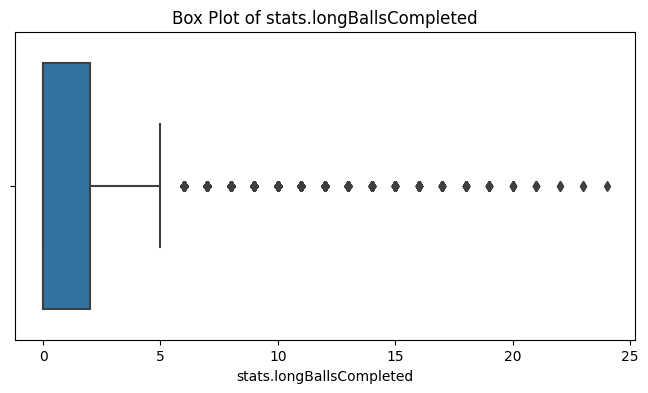

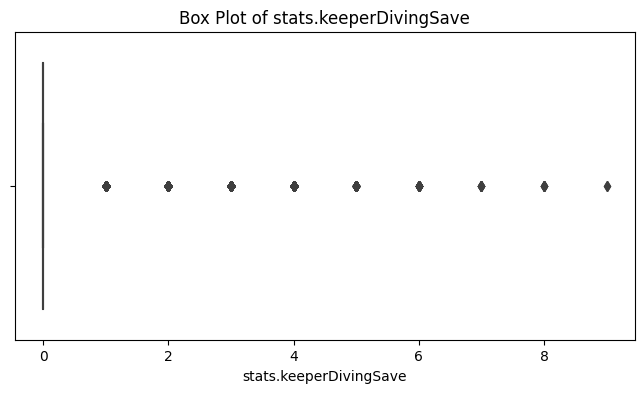

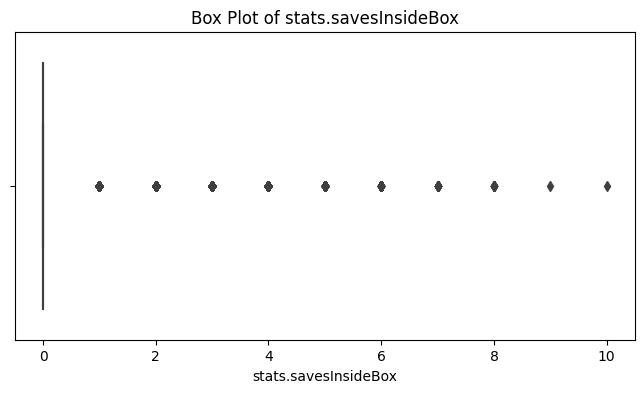

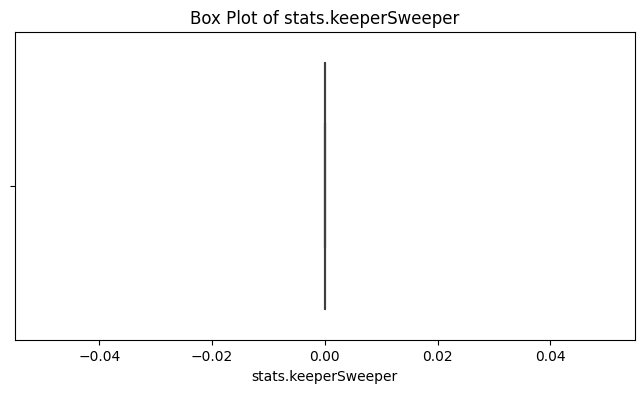

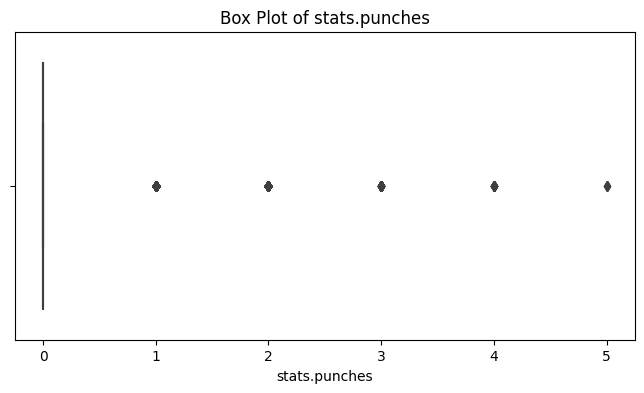

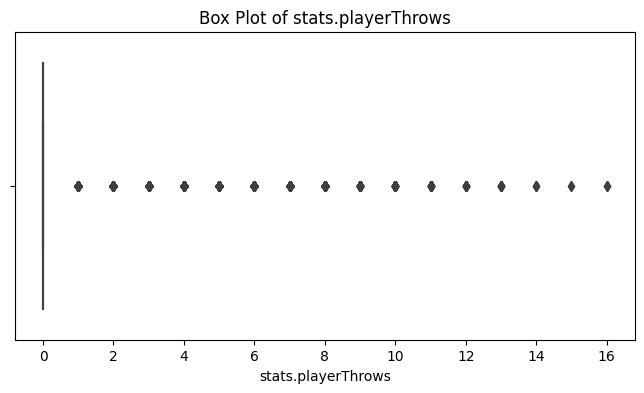

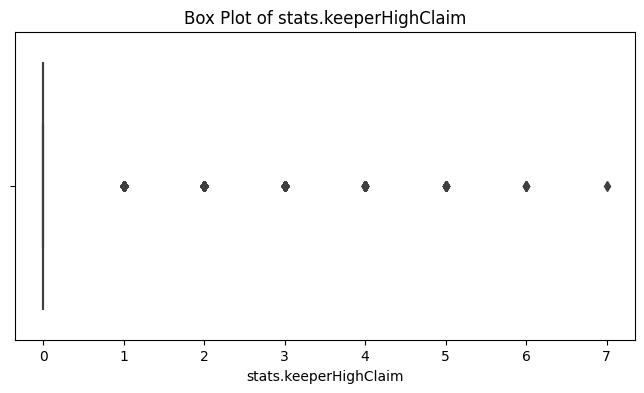

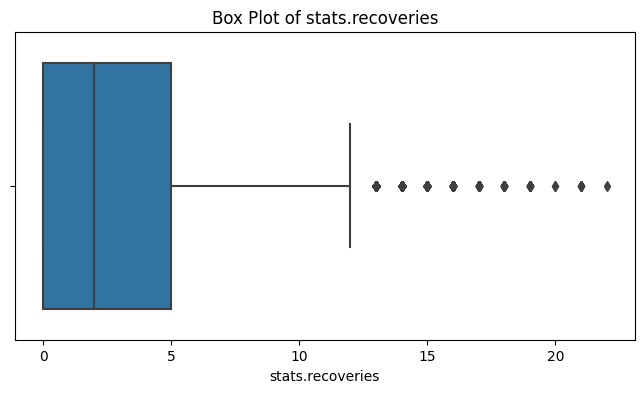

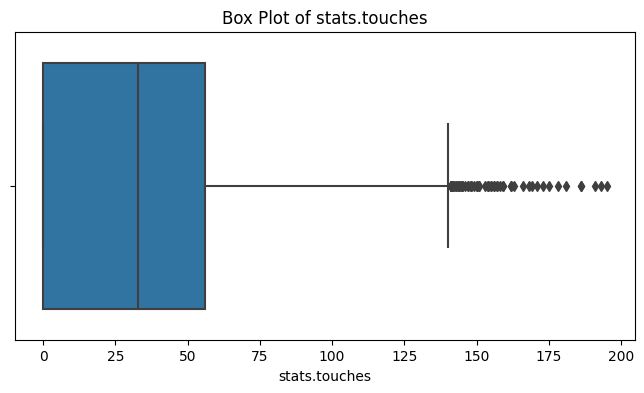

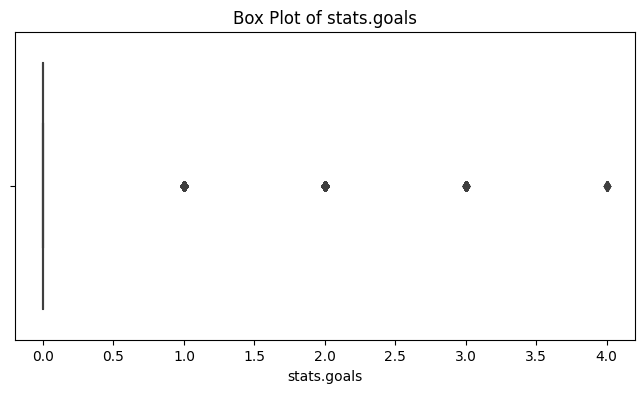

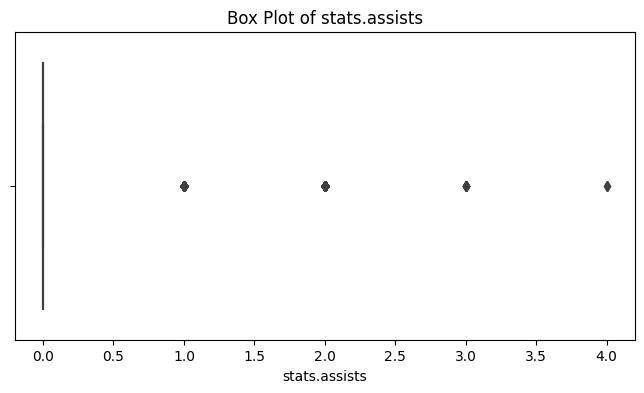

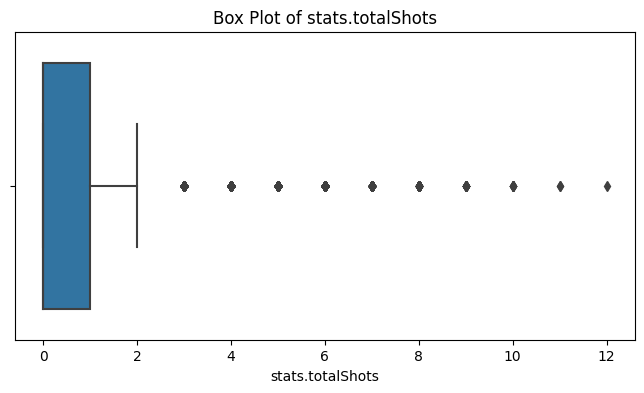

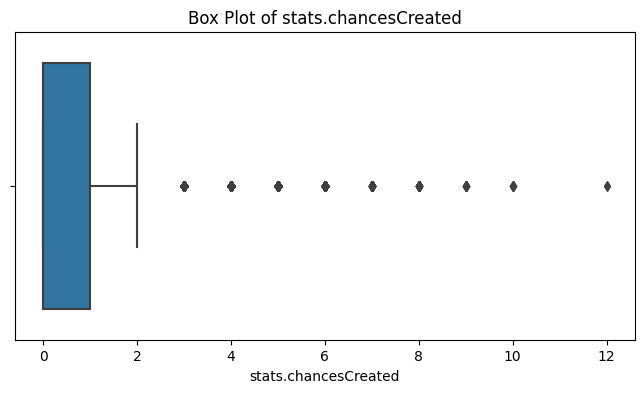

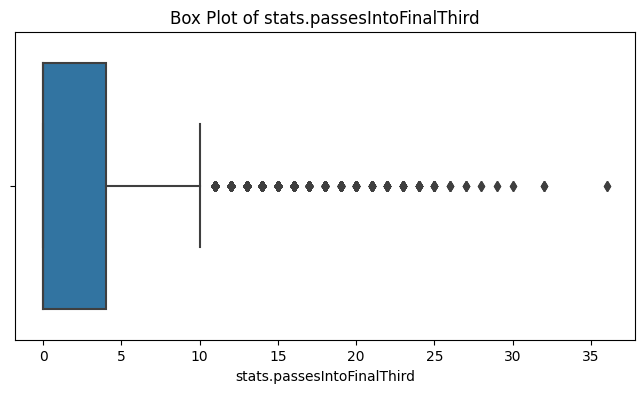

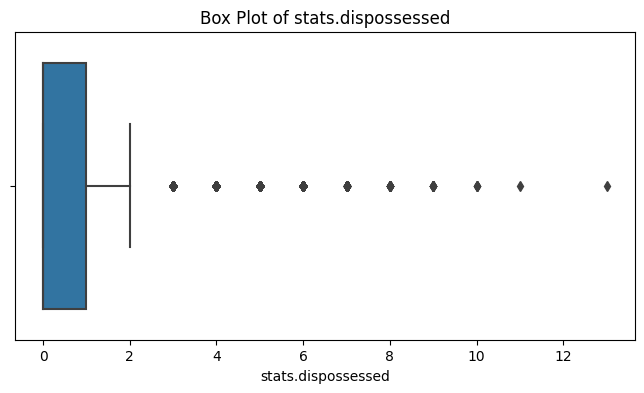

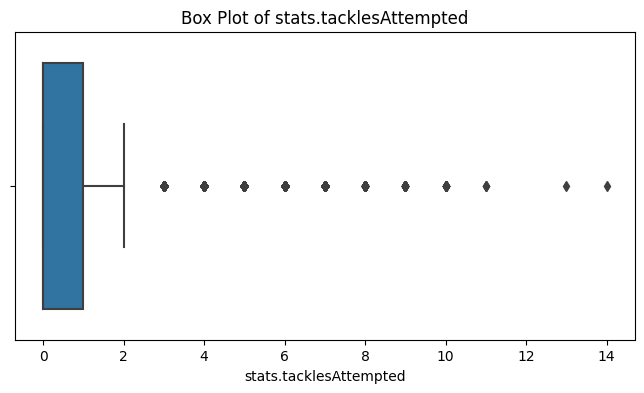

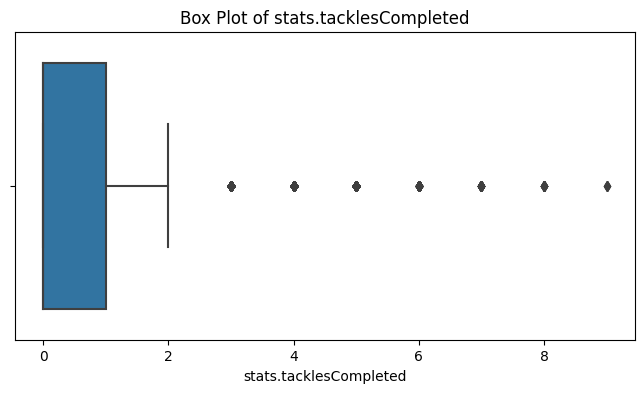

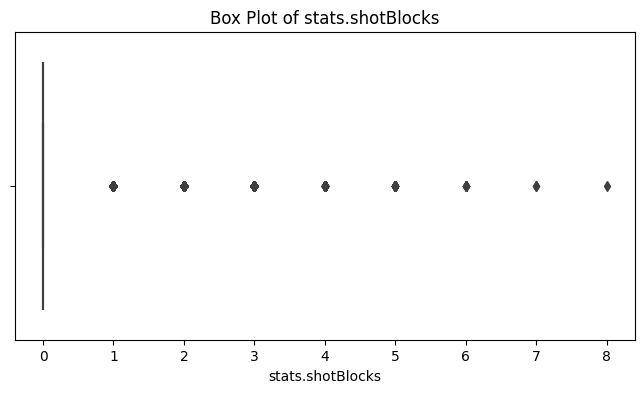

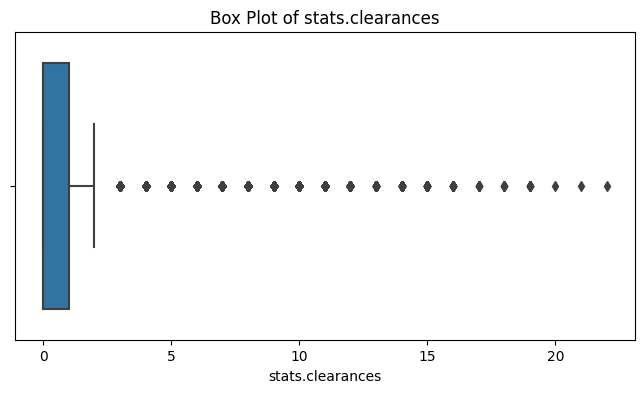

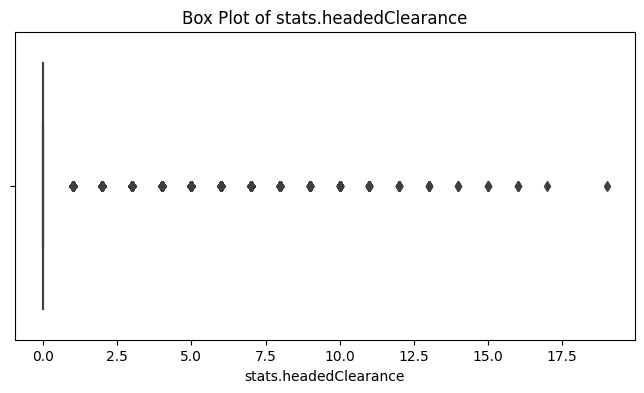

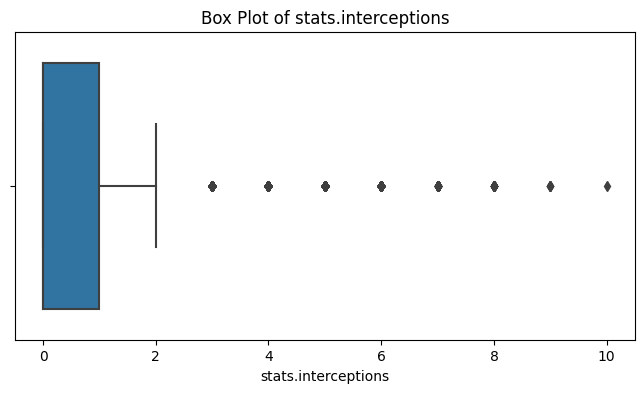

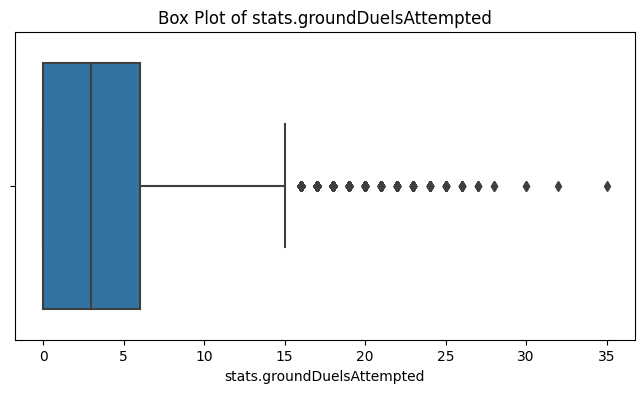

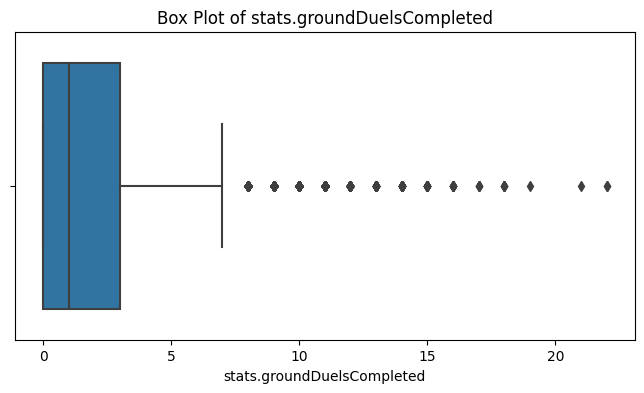

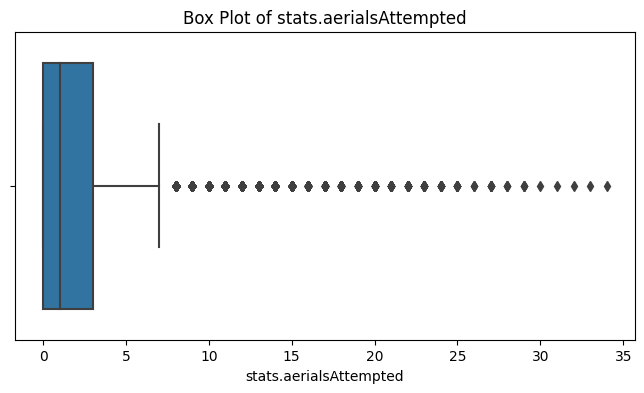

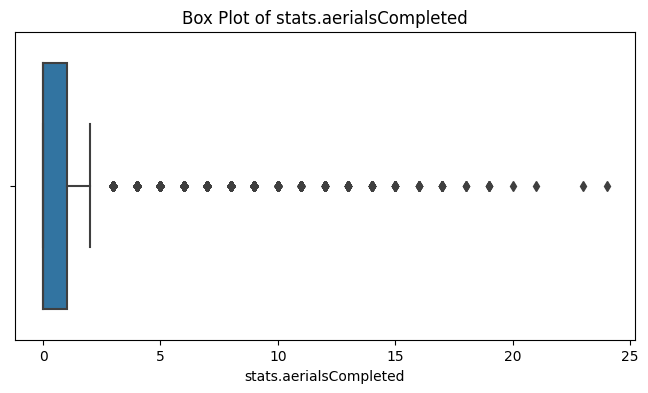

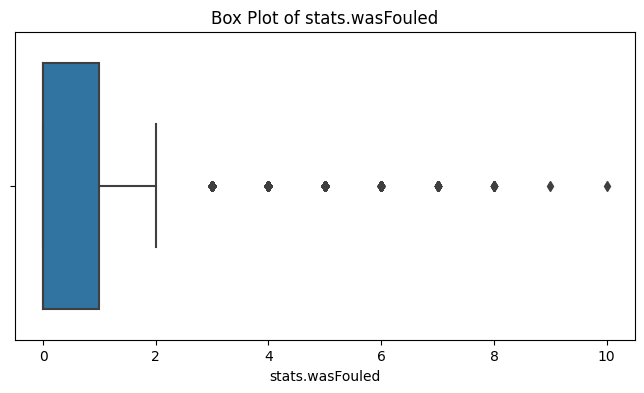

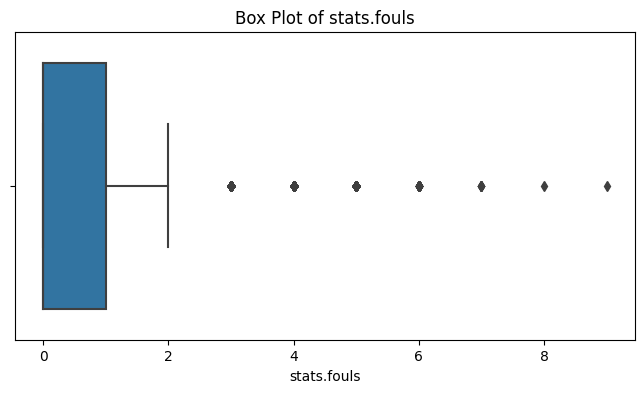

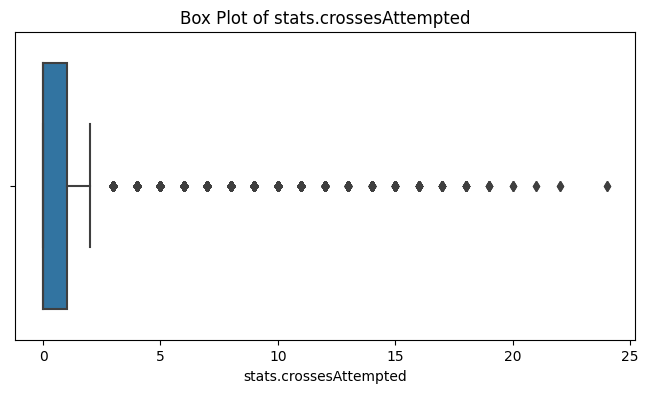

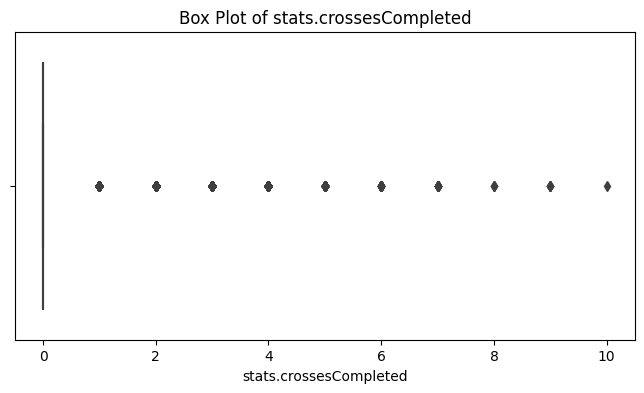

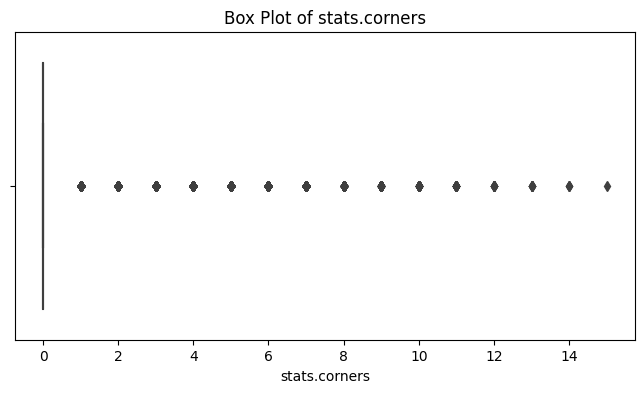

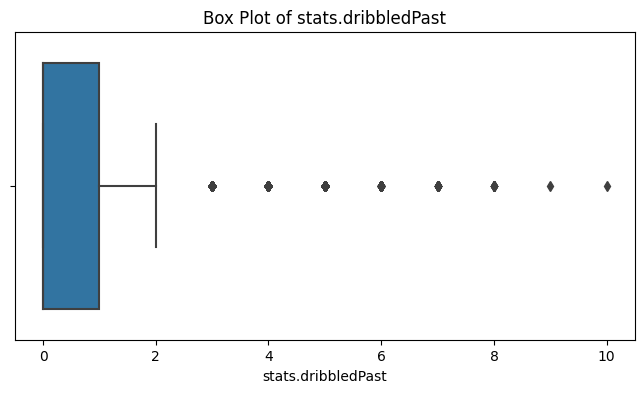

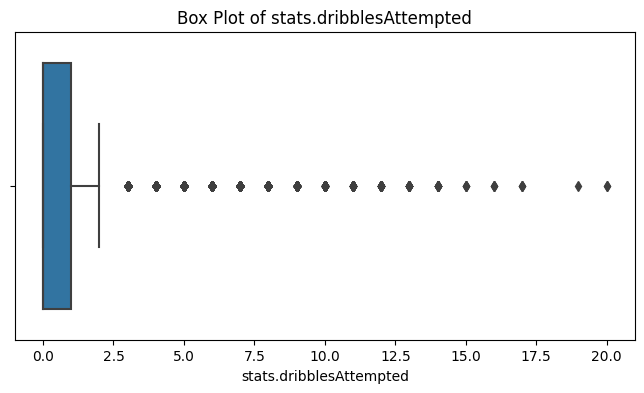

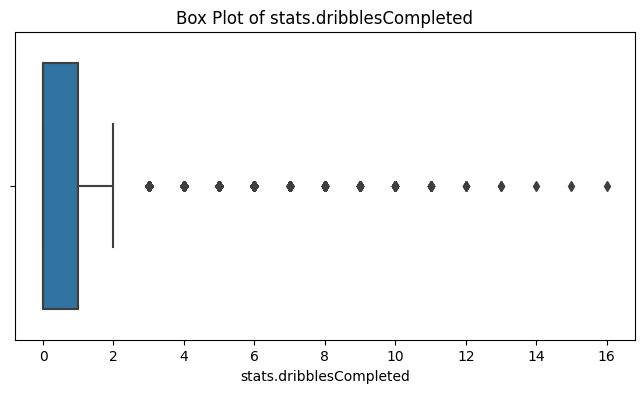

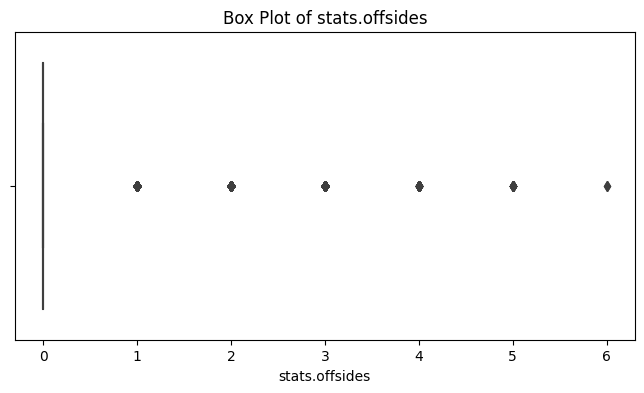

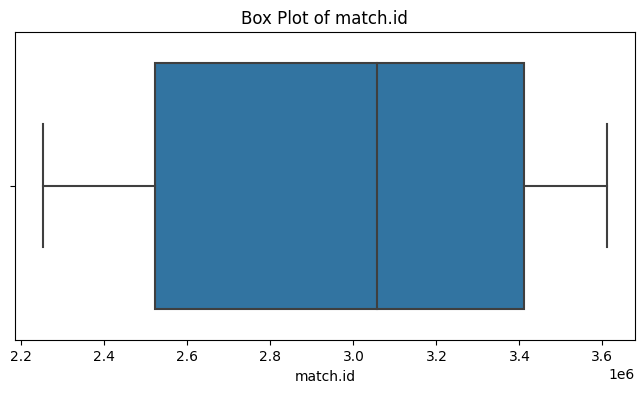

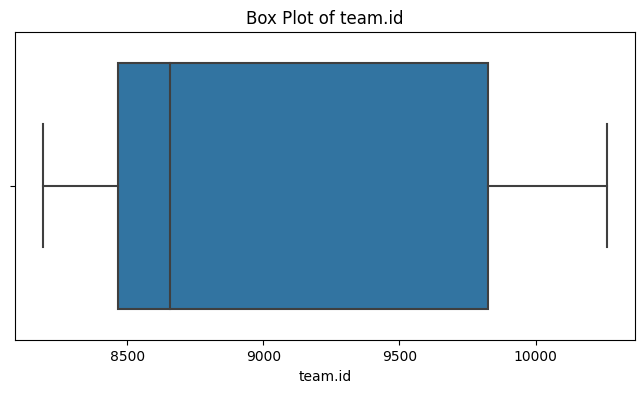

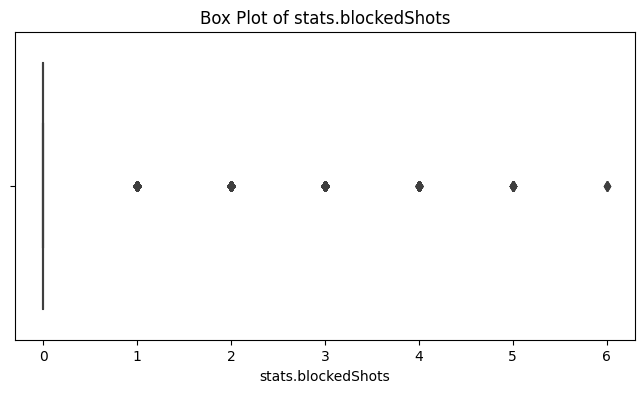

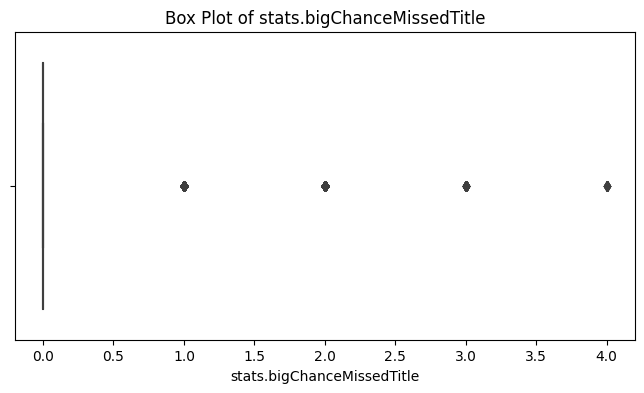

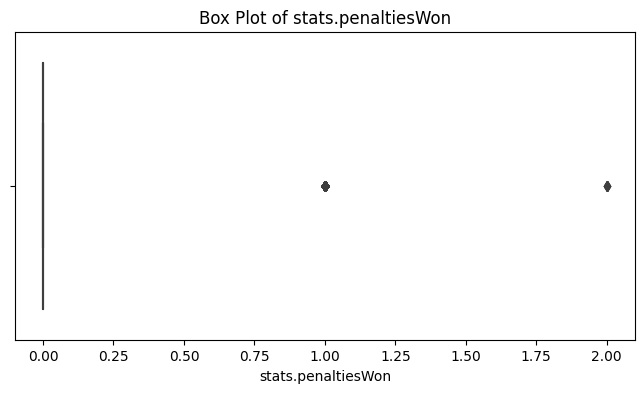

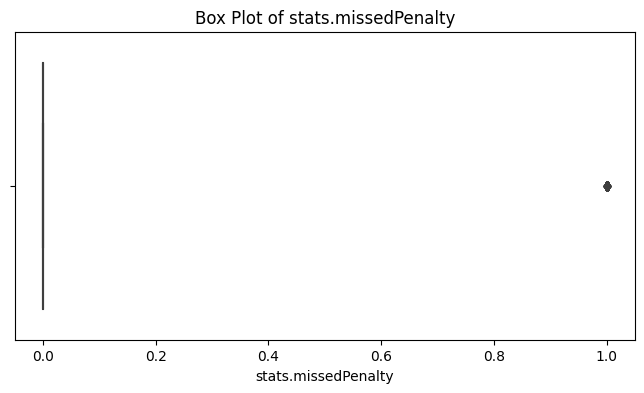

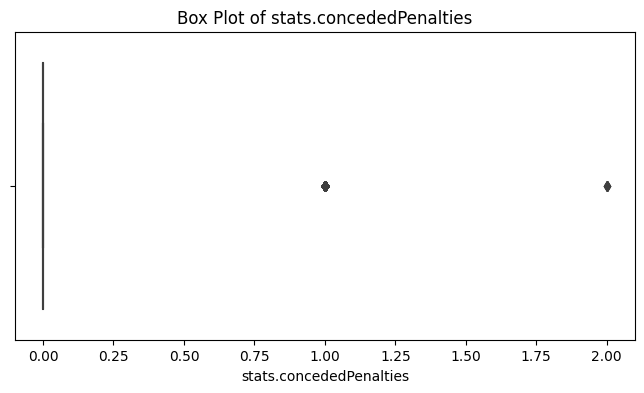

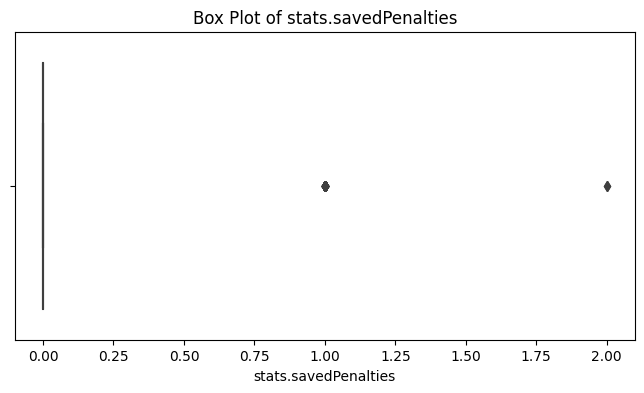

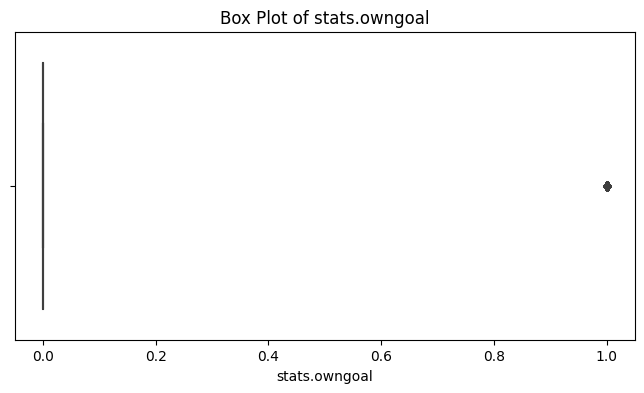

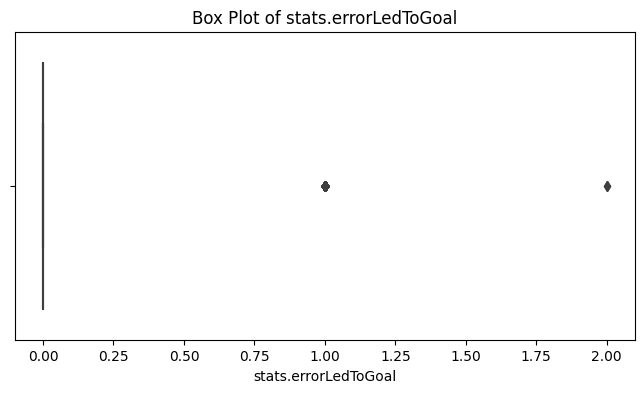

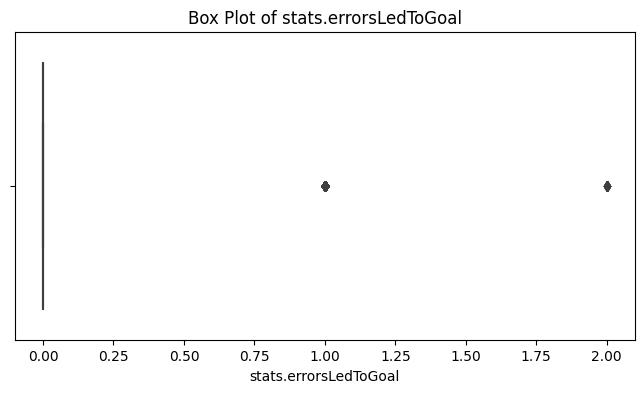

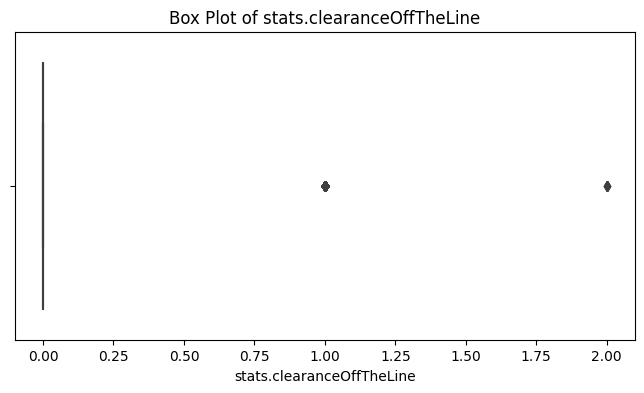

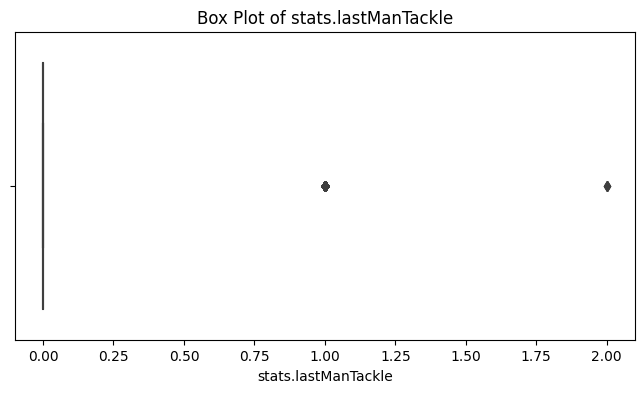

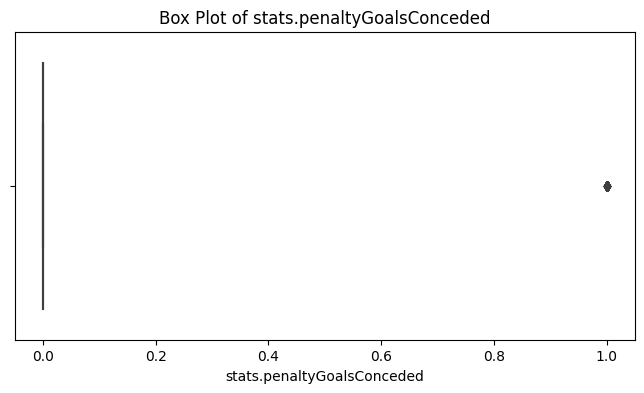

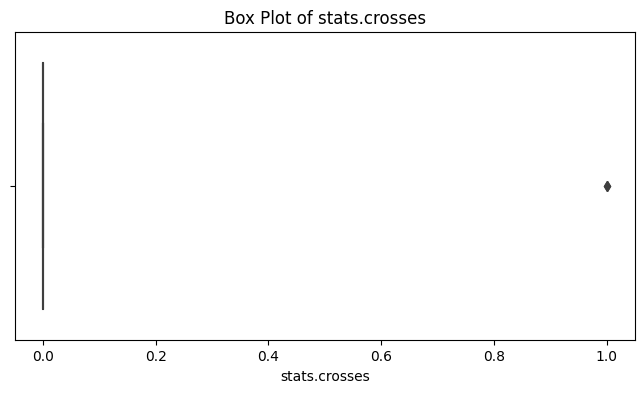

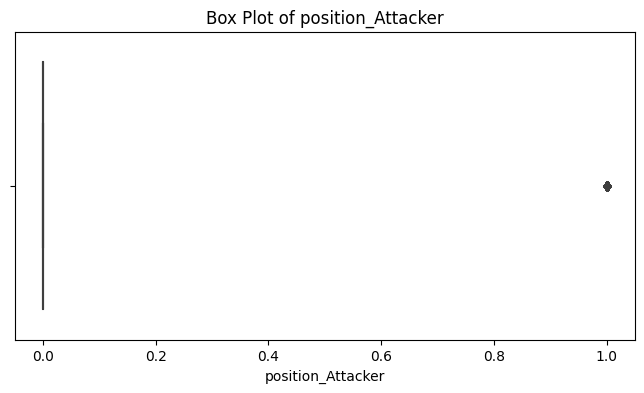

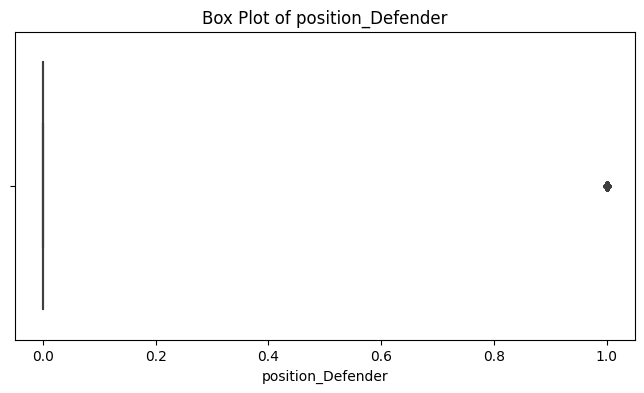

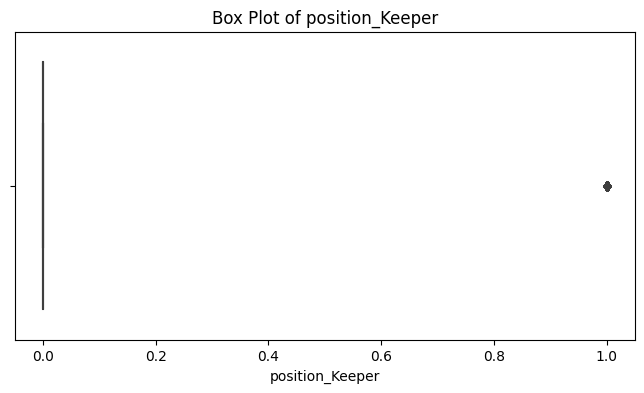

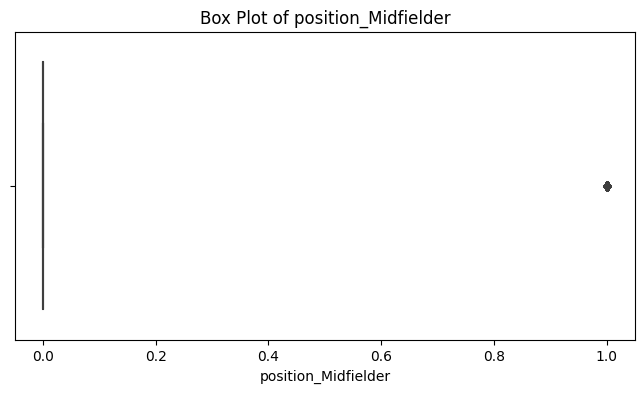

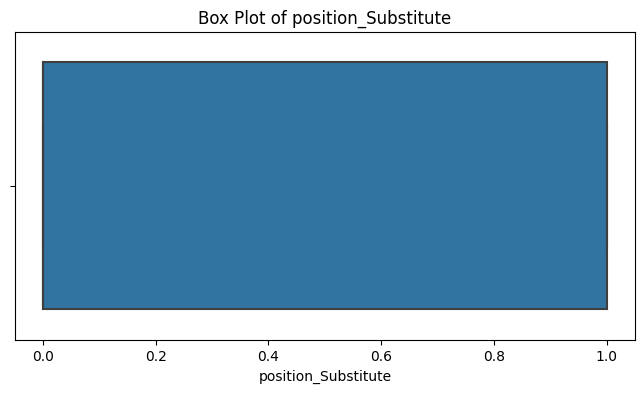

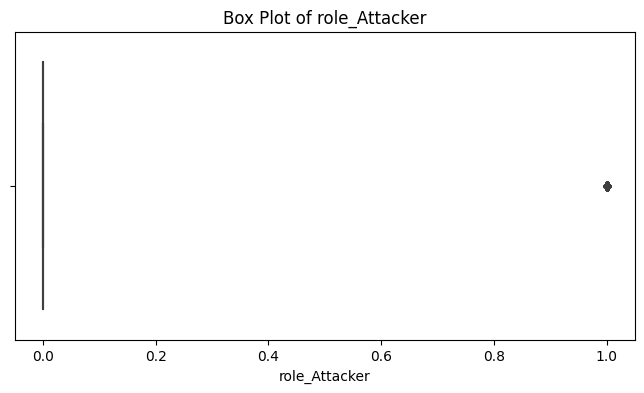

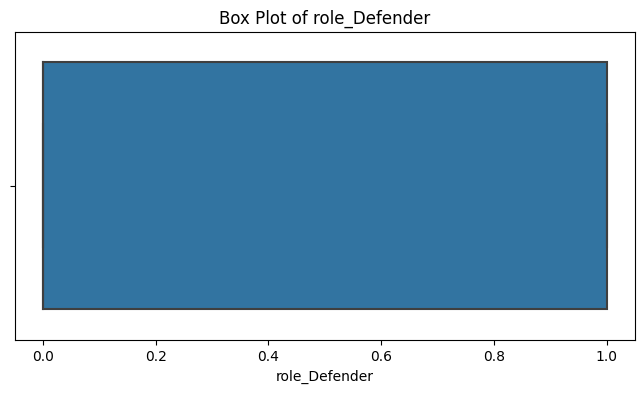

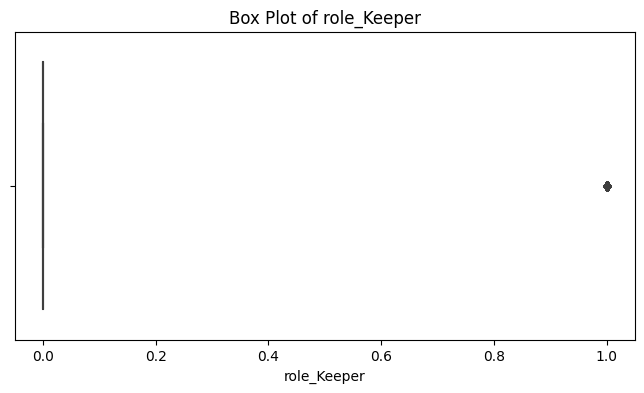

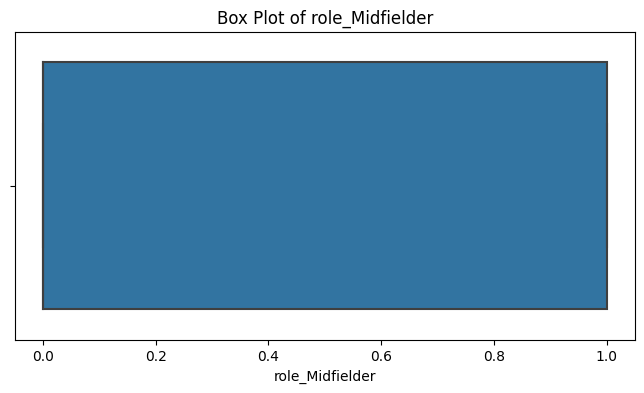

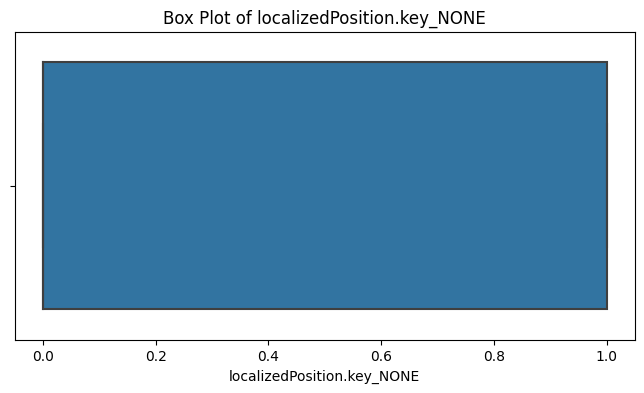

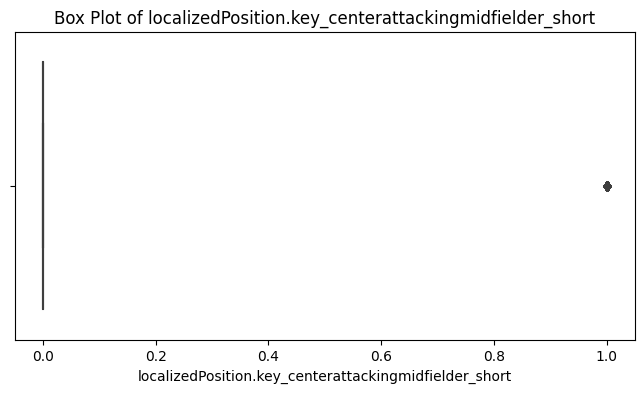

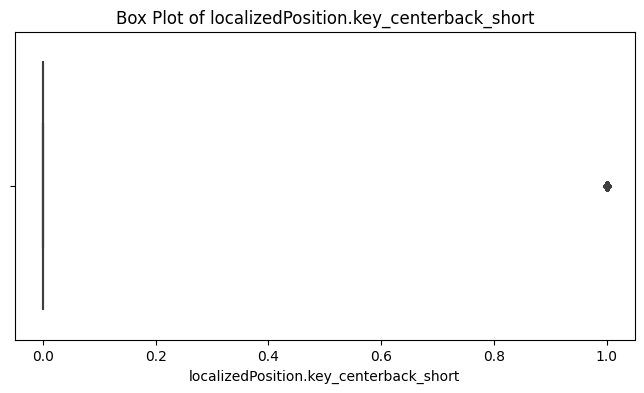

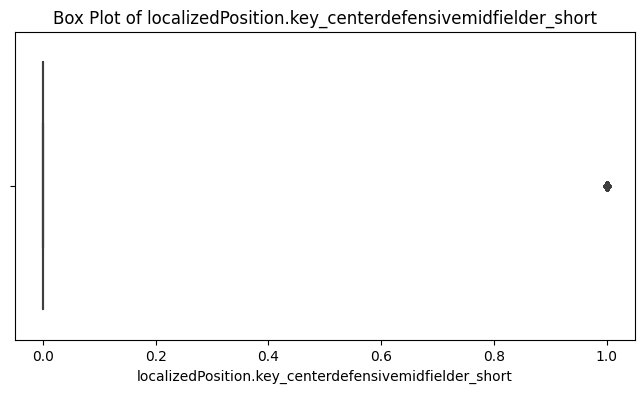

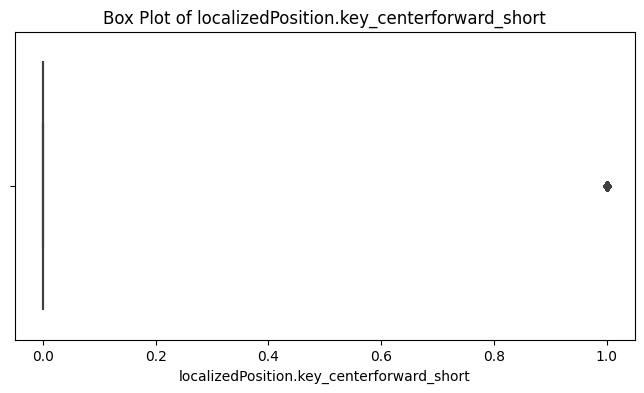

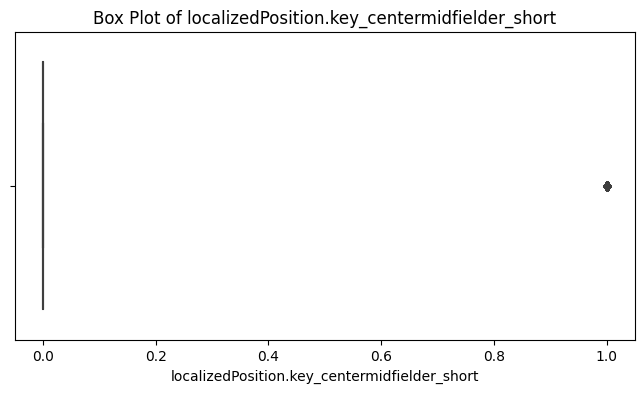

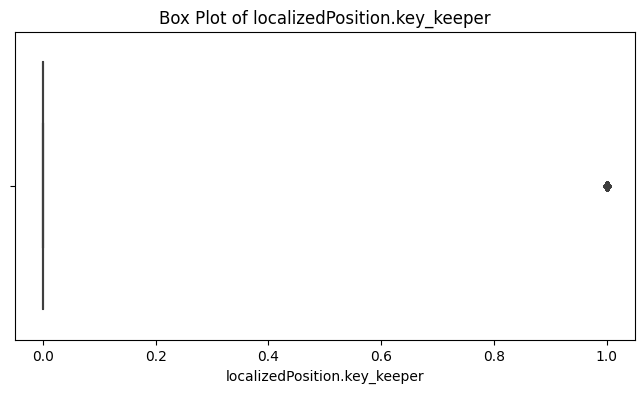

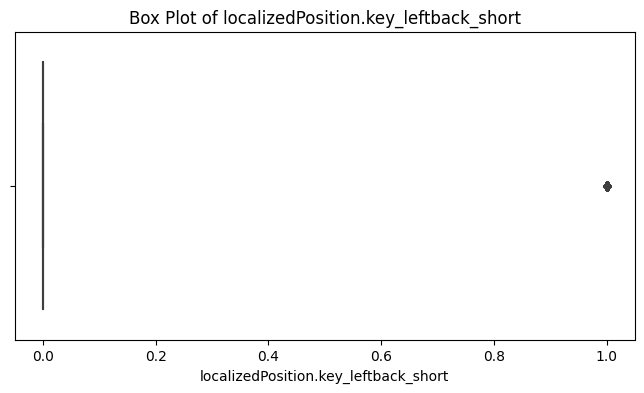

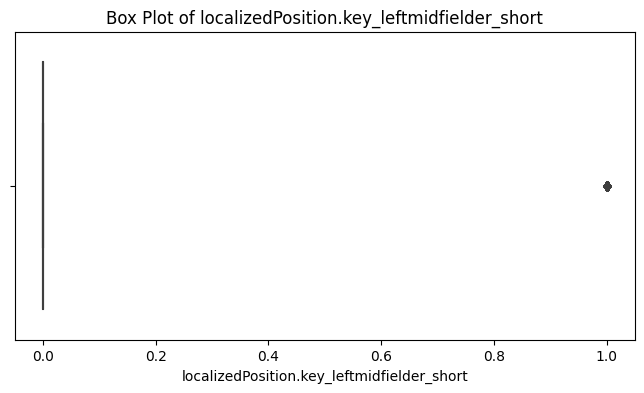

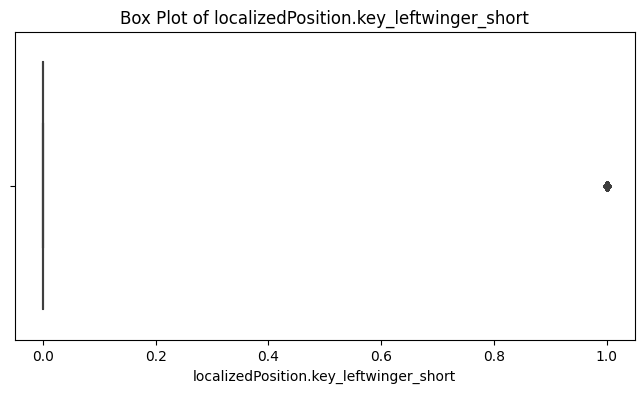

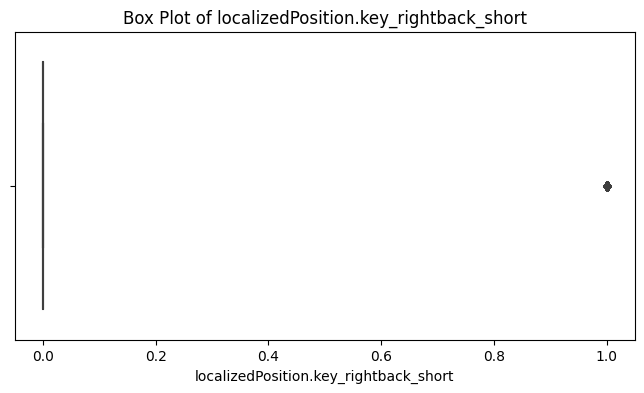

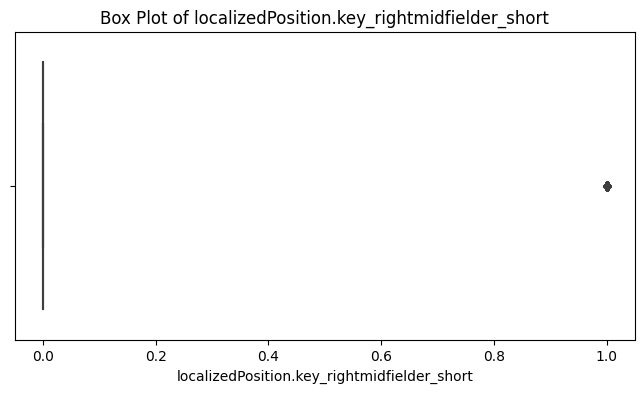

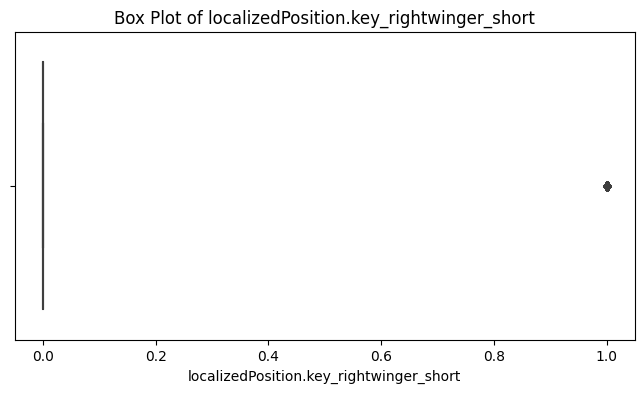

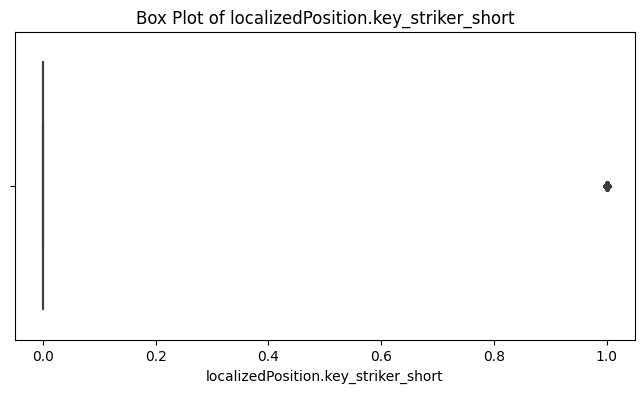

In [ ]:

#outlier analysis
numerical_columns = df.select_dtypes(include=['number'])

# Create a box plot for each numerical column
for column in numerical_columns.columns:
    plt.figure(figsize=(8, 4))  # Set the figure size
    sns.boxplot(x=numerical_columns[column])  # Create the box plot
    plt.title(f'Box Plot of {column}')  # Set the plot title
    plt.show()

#exploratory Data Analysis

<Axes: >

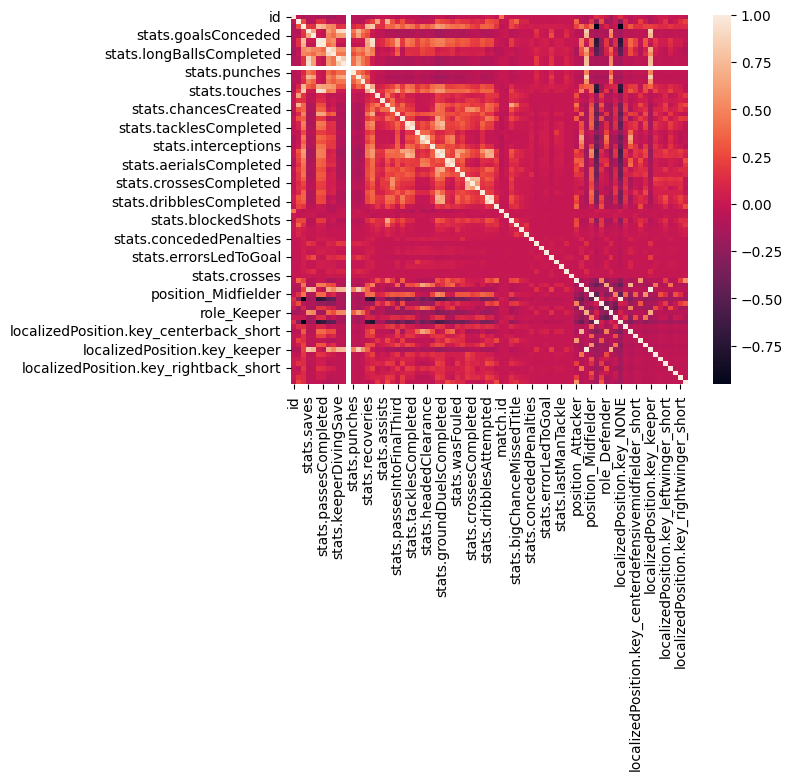

In [ ]:
# coorelation matrix
sns.heatmap(df.corr(numeric_only=True))

In [ ]:
dtypes_dict = df.dtypes.to_dict()
#fullname, leaguename, stadium,team.name,team.type,

dtypes_dict

{'id': dtype('int64'),
 'name.fullName': dtype('O'),
 'stats.shotsOnTarget': dtype('int64'),
 'stats.minutesPlayed': dtype('float64'),
 'stats.saves': dtype('float64'),
 'stats.goalsConceded': dtype('float64'),
 'stats.passesAttempted': dtype('float64'),
 'stats.passesCompleted': dtype('float64'),
 'stats.longBallsAttempted': dtype('float64'),
 'stats.longBallsCompleted': dtype('float64'),
 'stats.keeperDivingSave': dtype('float64'),
 'stats.savesInsideBox': dtype('float64'),
 'stats.keeperSweeper': dtype('float64'),
 'stats.punches': dtype('float64'),
 'stats.playerThrows': dtype('float64'),
 'stats.keeperHighClaim': dtype('float64'),
 'stats.recoveries': dtype('float64'),
 'stats.touches': dtype('float64'),
 'stats.goals': dtype('float64'),
 'stats.assists': dtype('float64'),
 'stats.totalShots': dtype('float64'),
 'stats.chancesCreated': dtype('float64'),
 'stats.passesIntoFinalThird': dtype('float64'),
 'stats.dispossessed': dtype('float64'),
 'stats.tacklesAttempted': dtype('float

In [ ]:
#coverting the columns into certain datatypes
for column in df.columns:
    if df[column].dtype == 'uint8':
        df[column] = df[column].astype(int)

In [ ]:
# convert object type to str (fullname, leaguename, stadium,team.name,team.type)
df['name.fullName'] = df['name.fullName'].astype(str)
df['leagueName'] = df['leagueName'].astype(str)
df['stadium'] = df['stadium'].astype(str)
df['team.type'] = df['team.type'].astype(str)
df['team.name'] = df['team.name'].astype(str)

In [ ]:
df['match_datetime'] = pd.to_datetime(df.match_datetime, format='%Y-%m-%d %H:%M:%S')
df['match_date'] = pd.to_datetime(df['match_datetime'].dt.date)
df['match_time'] = df['match_datetime'].dt.time


In [ ]:
df.to_csv("soccer_prediction_preprocessed.csv")

In [ ]:
#after converting
df.dtypes

id                                                      int64
name.fullName                                          object
stats.shotsOnTarget                                     int64
stats.minutesPlayed                                   float64
stats.saves                                           float64
                                                    ...      
localizedPosition.key_rightmidfielder_short             int64
localizedPosition.key_rightwinger_short                 int64
localizedPosition.key_striker_short                     int64
match_date                                     datetime64[ns]
match_time                                             object
Length: 88, dtype: object

In [ ]:
df.describe()

,id,stats.shotsOnTarget,stats.minutesPlayed,stats.saves,stats.goalsConceded,stats.passesAttempted,stats.passesCompleted,stats.longBallsAttempted,stats.longBallsCompleted,stats.keeperDivingSave,...,localizedPosition.key_centerforward_short,localizedPosition.key_centermidfielder_short,localizedPosition.key_keeper,localizedPosition.key_leftback_short,localizedPosition.key_leftmidfielder_short,localizedPosition.key_leftwinger_short,localizedPosition.key_rightback_short,localizedPosition.key_rightmidfielder_short,localizedPosition.key_rightwinger_short,localizedPosition.key_striker_short
count,8.486800e+04,84868.000000,84868.000000,84868.000000,84868.000000,84868.000000,84868.000000,84868.000000,84868.000000,84868.000000,...,84868.000000,84868.000000,84868.000000,84868.000000,84868.000000,84868.000000,84868.000000,84868.000000,84868.000000,84868.000000
mean,3.334329e+05,0.231925,53.100250,0.157232,0.074033,24.505962,19.586216,3.275840,1.491127,0.081326,...,0.036292,0.084732,0.053730,0.042124,0.023201,0.030907,0.042124,0.023201,0.030907,0.030412
std,2.846130e+05,0.579439,40.193925,0.803784,0.427856,24.201599,21.109697,5.199951,2.428334,0.466193,...,0.187016,0.278483,0.225486,0.200874,0.150541,0.173066,0.200874,0.150541,0.173066,0.171719
min,2.802000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.118000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.309160e+05,0.000000,77.000000,0.000000,0.000000,21.000000,14.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.221080e+05,0.000000,90.000000,0.000000,0.000000,39.000000,30.000000,5.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.365254e+06,7.000000,90.000000,14.000000,9.000000,188.000000,178.000000,47.000000,24.000000,9.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: xlabel='stats.passesAttempted', ylabel='Count'>

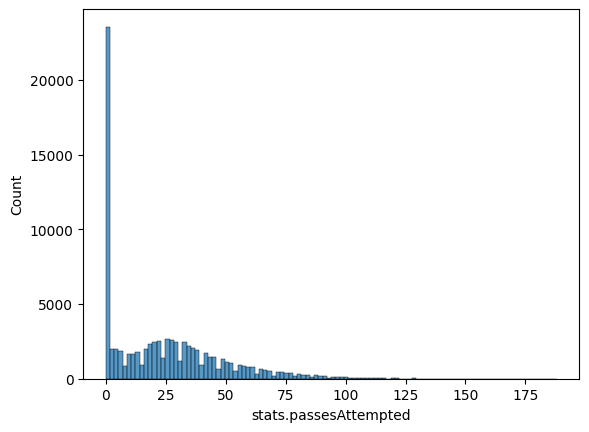

In [ ]:
sns.histplot(df['stats.passesAttempted'])

In [ ]:

def detect_outliers(df, threshold=3):

    df_outliers = df.copy()


    numeric_columns = df_outliers.select_dtypes(include=['number']).columns


    z_scores = zscore(df_outliers[numeric_columns])

    outlier_mask = (abs(z_scores) > threshold).any(axis=1)

    df_outliers['is_outlier'] = 0
    df_outliers.loc[outlier_mask, 'is_outlier'] = 1

    return df_outliers


outliers_df = detect_outliers(df, threshold=3)



In [ ]:
outliers_df[outliers_df['is_outlier']==1]

,id,name.fullName,stats.shotsOnTarget,stats.minutesPlayed,stats.saves,stats.goalsConceded,stats.passesAttempted,stats.passesCompleted,stats.longBallsAttempted,stats.longBallsCompleted,...,localizedPosition.key_leftback_short,localizedPosition.key_leftmidfielder_short,localizedPosition.key_leftwinger_short,localizedPosition.key_rightback_short,localizedPosition.key_rightmidfielder_short,localizedPosition.key_rightwinger_short,localizedPosition.key_striker_short,match_date,match_time,is_outlier
0,37770,Kasper Schmeichel,0,90.0,0.0,3.0,26.0,11.0,25.0,10.0,...,0,0,0,0,0,0,0,2017-01-14,17:30:00,1
1,23571,Wes Morgan,0,90.0,0.0,0.0,32.0,25.0,1.0,1.0,...,0,0,0,0,0,0,0,2017-01-14,17:30:00,1
3,43061,Christian Fuchs,1,90.0,0.0,0.0,37.0,25.0,7.0,4.0,...,0,0,0,0,0,0,0,2017-01-14,17:30:00,1
4,139671,Marc Albrighton,0,77.0,0.0,0.0,35.0,15.0,13.0,1.0,...,0,0,0,0,1,0,0,2017-01-14,17:30:00,1
5,173317,Danny Drinkwater,0,90.0,0.0,0.0,49.0,36.0,6.0,2.0,...,0,0,0,0,0,0,0,2017-01-14,17:30:00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84852,442277,Miguel Almiron,0,74.0,0.0,0.0,15.0,11.0,0.0,0.0,...,0,0,0,0,1,0,0,2021-11-06,17:30:00,1
84853,155913,Matt Ritchie,0,90.0,0.0,0.0,28.0,20.0,6.0,1.0,...,1,0,0,0,0,0,0,2021-11-06,17:30:00,1
84854,161414,Ciaran Clark,0,90.0,0.0,0.0,46.0,37.0,6.0,3.0,...,0,0,0,0,0,0,0,2021-11-06,17:30:00,1
84857,521148,Jacob Murphy,0,90.0,0.0,0.0,33.0,22.0,2.0,0.0,...,0,0,0,1,0,0,0,2021-11-06,17:30:00,1


In [ ]:
# using interquartile range

def detect_outliers_iqr(df, threshold=1.5):


    df_outliers = df.copy()

    numeric_columns = df_outliers.select_dtypes(include=['number']).columns


    Q1 = df_outliers[numeric_columns].quantile(0.25)
    Q3 = df_outliers[numeric_columns].quantile(0.75)
    IQR = Q3 - Q1

    outlier_mask = ((df_outliers[numeric_columns] < (Q1 - threshold * IQR)) | (df_outliers[numeric_columns] > (Q3 + threshold * IQR))).any(axis=1)


    df_outliers['is_outlier_iqr'] = 0
    df_outliers.loc[outlier_mask, 'is_outlier_iqr'] = 1

    return df_outliers


outliers_iqr_df = detect_outliers_iqr(df, threshold=1.5)


In [ ]:
len(outliers_iqr_df[outliers_iqr_df['is_outlier_iqr']==1]['name.fullName'].unique())

1417

In [ ]:
outliers_iqr_df['name.fullName'].value_counts()

César Azpilicueta    224
Riyad Mahrez         220
David De Gea         219
James Ward-Prowse    219
Raheem Sterling      216
                    ... 
Luca de la Torre       1
Cameron John           1
Tyreke Johnson         1
Bright Enobakhare      1
Samuel Edozie          1
Name: name.fullName, Length: 1632, dtype: int64

#Regression analysis
## considering Stats *columns*

In [ ]:
# target = df["stats.passesCompleted"]
# df = df.drop(["stats.passesCompleted"],axis=1)
# target.head(10)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import statsmodels.api as sm
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression

In [ ]:
df = pd.read_csv('soccer_prediction_preprocessed.csv')

In [ ]:
def filter_player(player):
  player = player.lower()
  player_df = df[df['name.fullName'] == player]

  return player_df

df = filter_player('Kasper Schmeichel')

In [ ]:
df

,id,name.fullName,stats.shotsOnTarget,stats.minutesPlayed,stats.saves,stats.goalsConceded,stats.passesAttempted,stats.passesCompleted,stats.longBallsAttempted,stats.longBallsCompleted,...,localizedPosition.key_keeper,localizedPosition.key_leftback_short,localizedPosition.key_leftmidfielder_short,localizedPosition.key_leftwinger_short,localizedPosition.key_rightback_short,localizedPosition.key_rightmidfielder_short,localizedPosition.key_rightwinger_short,localizedPosition.key_striker_short,match_date,match_time
0,37770,kasper schmeichel,0,90.0,0.0,3.0,26.0,11.0,25.0,10.0,...,1,0,0,0,0,0,0,0,2017-01-14,17:30:00
504,37770,kasper schmeichel,0,90.0,6.0,1.0,27.0,11.0,26.0,11.0,...,1,0,0,0,0,0,0,0,2017-02-27,20:00:00
1008,37770,kasper schmeichel,0,90.0,5.0,1.0,29.0,12.0,27.0,10.0,...,1,0,0,0,0,0,0,0,2016-10-22,14:00:00
1504,37770,kasper schmeichel,0,90.0,3.0,2.0,42.0,22.0,34.0,15.0,...,1,0,0,0,0,0,0,0,2017-05-13,11:30:00
2483,37770,kasper schmeichel,0,57.0,2.0,0.0,25.0,9.0,21.0,6.0,...,1,0,0,0,0,0,0,0,2016-08-27,14:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83861,37770,kasper schmeichel,0,90.0,5.0,2.0,46.0,32.0,24.0,11.0,...,1,0,0,0,0,0,0,0,2021-12-01,19:30:00
84101,37770,kasper schmeichel,0,90.0,4.0,1.0,23.0,16.0,13.0,6.0,...,1,0,0,0,0,0,0,0,2022-04-02,16:30:00
84191,37770,kasper schmeichel,0,90.0,2.0,2.0,29.0,19.0,18.0,9.0,...,1,0,0,0,0,0,0,0,2021-09-25,14:00:00
84351,37770,kasper schmeichel,0,90.0,3.0,0.0,32.0,26.0,11.0,5.0,...,1,0,0,0,0,0,0,0,2021-08-14,14:00:00


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
cat_list=['name.fullName', 'leagueName', 'stadium', 'team.type', 'team.name']
df.drop('match_datetime',inplace=True,axis=1)
df.drop(['match_time'],axis=1,inplace=True)
df[cat_list]=df[cat_list].apply(lambda x:le.fit_transform(x))

In [ ]:


X = df.drop('stats.passesCompleted', axis=1)
y = df['stats.passesCompleted']



In [ ]:
df.dtypes

id                                                      int64
name.fullName                                           int64
stats.shotsOnTarget                                     int64
stats.minutesPlayed                                   float64
stats.saves                                           float64
                                                    ...      
localizedPosition.key_rightback_short                   int64
localizedPosition.key_rightmidfielder_short             int64
localizedPosition.key_rightwinger_short                 int64
localizedPosition.key_striker_short                     int64
match_date                                     datetime64[ns]
Length: 86, dtype: object

In [ ]:
# # Standardize the features
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)



In [ ]:
df.sort_values('match_date', inplace=True)

df.set_index('match_date', inplace=True)

n_splits = 5

In [ ]:
# # Apply PCA to reduce dimensionality
# pca = PCA(n_components=0.95)  # Adjust the explained variance threshold as needed
# X_pca = pca.fit_transform(X_scaled)

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# # Fit Negative Binomial regression model using statsmodels
# model = sm.GLM(y, sm.add_constant(X_pca), family=sm.families.NegativeBinomial())
# results = model.fit()


# print(results.summary())

# # Make predictions on the test set
# y_pred = results.predict(sm.add_constant())


# from sklearn.metrics import mean_squared_error

# mse = mean_squared_error(y_test, y_pred)
# print(f"Mean Squared Error on Test Set: {mse}")

In [ ]:
tscv = TimeSeriesSplit(n_splits=n_splits)

for train_index, test_index in tscv.split(df):
    train, test = df.iloc[train_index], df.iloc[test_index]

# Separate features and target variable
X_train, y_train = train.drop(columns=['stats.passesCompleted']), train['stats.passesCompleted']
X_test, y_test = test.drop(columns=['stats.passesCompleted']), test['stats.passesCompleted']

# Train your model on the training set
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)



print("Linear Regressor")
print("R2 Score: ", round(r2,3))
print("RMSE: ", round(rmse,3))
print("MAE: ", round(mae,3))

Linear Regressor
R2 Score:  0.992
RMSE:  0.61
MAE:  0.467


In [ ]:
y_pred = model.predict(sm.add_constant(X_test))

# Create a DataFrame with actual and predicted values side by side
result_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Print the DataFrame with actual and predicted values
print(result_df)

            Actual  Predicted
match_date                   
2021-09-11    32.0  33.277468
2021-09-19    16.0  15.967576
2021-09-25    19.0  19.661136
2021-10-03    19.0  18.868520
2021-10-16    34.0  33.128286
2021-10-24    21.0  20.477074
2021-10-30    33.0  32.202931
2021-11-07    26.0  25.381747
2021-11-20    21.0  21.537179
2021-11-28    21.0  20.450280
2021-12-01    32.0  32.469860
2021-12-05    11.0  11.331860
2021-12-12    16.0  16.109447
2021-12-26    20.0  19.285591
2021-12-28    17.0  17.062821
2022-01-19    25.0  24.445782
2022-01-23    15.0  15.874412
2022-02-10    16.0  16.319880
2022-02-13    19.0  18.718418
2022-02-20    20.0  19.914233
2022-03-01    17.0  17.083858
2022-03-05    22.0  21.604486
2022-03-13    23.0  23.646418
2022-03-20    26.0  25.658700
2022-04-02    16.0  16.060783
2022-04-10    20.0  20.628071
2022-04-17    19.0  19.168609
2022-04-20    30.0  29.652245
2022-04-23    14.0  14.043989
2022-05-01    13.0  12.998405
2022-05-08    16.0  16.783403
2022-05-11

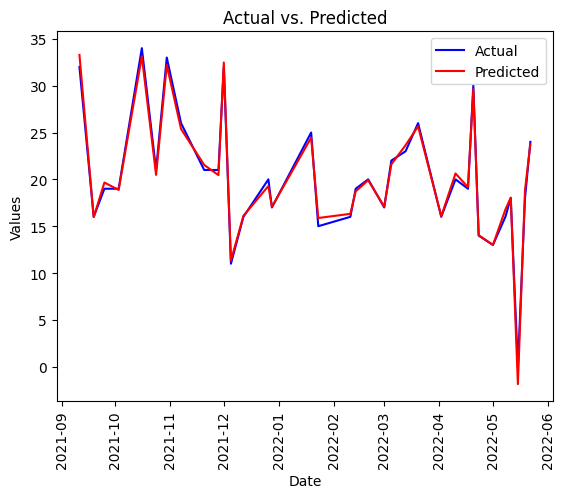

In [ ]:
plt.plot(result_df.index, result_df['Actual'], label='Actual', color='blue')
plt.plot(result_df.index, result_df['Predicted'], label='Predicted', color='red')

# Formatting (same as above)
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Actual vs. Predicted')
plt.xticks(rotation=90)
plt.legend()
plt.show()



#Timeseries Analysis

In [ ]:
df = pd.read_csv("/content/soccer_prediction_preprocessed.csv",index_col=0)
df['name.fullName'] = df['name.fullName'].apply(lambda x : x.lower())
df['match_date'] = pd.to_datetime(df['match_date'])

In [ ]:
df.head()

,id,name.fullName,stats.shotsOnTarget,stats.minutesPlayed,stats.saves,stats.goalsConceded,stats.passesAttempted,stats.passesCompleted,stats.longBallsAttempted,stats.longBallsCompleted,...,localizedPosition.key_keeper,localizedPosition.key_leftback_short,localizedPosition.key_leftmidfielder_short,localizedPosition.key_leftwinger_short,localizedPosition.key_rightback_short,localizedPosition.key_rightmidfielder_short,localizedPosition.key_rightwinger_short,localizedPosition.key_striker_short,match_date,match_time
0,37770,kasper schmeichel,0,90.0,0.0,3.0,26.0,11.0,25.0,10.0,...,1,0,0,0,0,0,0,0,2017-01-14,17:30:00
1,23571,wes morgan,0,90.0,0.0,0.0,32.0,25.0,1.0,1.0,...,0,0,0,0,0,0,0,0,2017-01-14,17:30:00
2,38899,robert huth,0,60.0,0.0,0.0,17.0,13.0,4.0,2.0,...,0,0,0,0,0,0,0,0,2017-01-14,17:30:00
3,43061,christian fuchs,1,90.0,0.0,0.0,37.0,25.0,7.0,4.0,...,0,0,0,0,0,0,0,0,2017-01-14,17:30:00
4,139671,marc albrighton,0,77.0,0.0,0.0,35.0,15.0,13.0,1.0,...,0,0,0,0,0,1,0,0,2017-01-14,17:30:00


In [ ]:
def filter_player(player):
  player = player.lower()
  player_df = df[df['name.fullName'] == player]

  return player_df

In [ ]:
player_df = filter_player('Kasper Schmeichel')

In [ ]:
player_df

,id,name.fullName,stats.shotsOnTarget,stats.minutesPlayed,stats.saves,stats.goalsConceded,stats.passesAttempted,stats.passesCompleted,stats.longBallsAttempted,stats.longBallsCompleted,...,localizedPosition.key_keeper,localizedPosition.key_leftback_short,localizedPosition.key_leftmidfielder_short,localizedPosition.key_leftwinger_short,localizedPosition.key_rightback_short,localizedPosition.key_rightmidfielder_short,localizedPosition.key_rightwinger_short,localizedPosition.key_striker_short,match_date,match_time
0,37770,kasper schmeichel,0,90.0,0.0,3.0,26.0,11.0,25.0,10.0,...,1,0,0,0,0,0,0,0,2017-01-14,17:30:00
504,37770,kasper schmeichel,0,90.0,6.0,1.0,27.0,11.0,26.0,11.0,...,1,0,0,0,0,0,0,0,2017-02-27,20:00:00
1008,37770,kasper schmeichel,0,90.0,5.0,1.0,29.0,12.0,27.0,10.0,...,1,0,0,0,0,0,0,0,2016-10-22,14:00:00
1504,37770,kasper schmeichel,0,90.0,3.0,2.0,42.0,22.0,34.0,15.0,...,1,0,0,0,0,0,0,0,2017-05-13,11:30:00
2483,37770,kasper schmeichel,0,57.0,2.0,0.0,25.0,9.0,21.0,6.0,...,1,0,0,0,0,0,0,0,2016-08-27,14:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83861,37770,kasper schmeichel,0,90.0,5.0,2.0,46.0,32.0,24.0,11.0,...,1,0,0,0,0,0,0,0,2021-12-01,19:30:00
84101,37770,kasper schmeichel,0,90.0,4.0,1.0,23.0,16.0,13.0,6.0,...,1,0,0,0,0,0,0,0,2022-04-02,16:30:00
84191,37770,kasper schmeichel,0,90.0,2.0,2.0,29.0,19.0,18.0,9.0,...,1,0,0,0,0,0,0,0,2021-09-25,14:00:00
84351,37770,kasper schmeichel,0,90.0,3.0,0.0,32.0,26.0,11.0,5.0,...,1,0,0,0,0,0,0,0,2021-08-14,14:00:00


In [ ]:
player_df[player_df['match_date'] == '2022-05-15']

,id,name.fullName,stats.shotsOnTarget,stats.minutesPlayed,stats.saves,stats.goalsConceded,stats.passesAttempted,stats.passesCompleted,stats.longBallsAttempted,stats.longBallsCompleted,...,localizedPosition.key_keeper,localizedPosition.key_leftback_short,localizedPosition.key_leftmidfielder_short,localizedPosition.key_leftwinger_short,localizedPosition.key_rightback_short,localizedPosition.key_rightmidfielder_short,localizedPosition.key_rightwinger_short,localizedPosition.key_striker_short,match_date,match_time
81681,37770,kasper schmeichel,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,2022-05-15,13:00:00


In [ ]:
df.dtypes

id                                                      int64
name.fullName                                          object
stats.shotsOnTarget                                     int64
stats.minutesPlayed                                   float64
stats.saves                                           float64
                                                    ...      
localizedPosition.key_rightmidfielder_short             int64
localizedPosition.key_rightwinger_short                 int64
localizedPosition.key_striker_short                     int64
match_date                                     datetime64[ns]
match_time                                             object
Length: 88, dtype: object

In [ ]:
type(df['name.fullName'][0])

str

In [ ]:
time_df = pd.DataFrame()
temp_df = player_df
time_df['stats.passesCompleted'] = temp_df['stats.passesCompleted']
time_df['match_date'] = temp_df['match_date']
time_df.set_index('match_date',inplace=True)

<Axes: xlabel='match_date'>

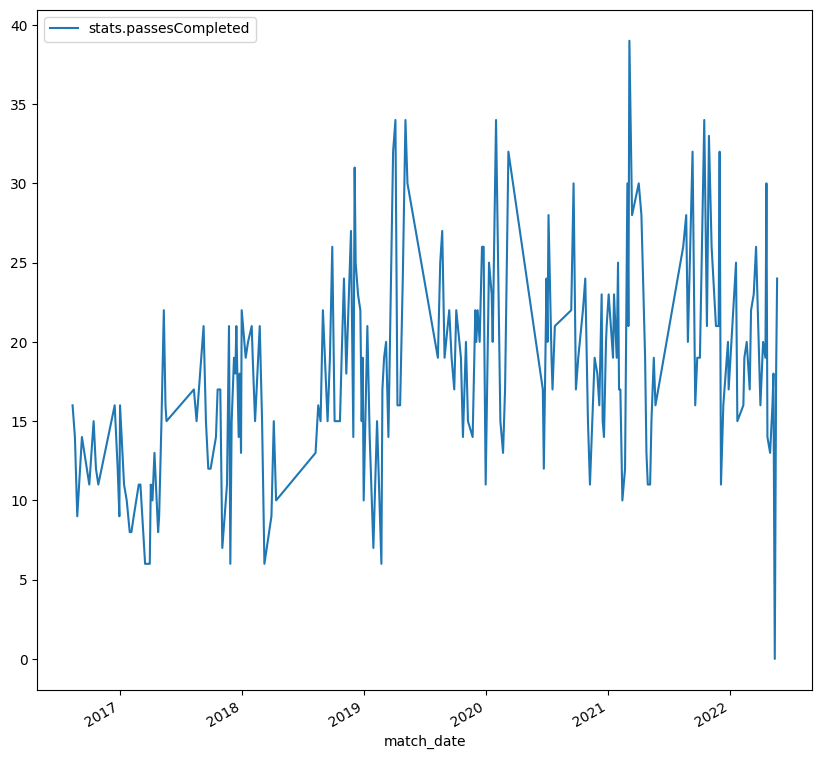

In [ ]:
time_df.plot(y='stats.passesCompleted',kind='line',figsize=(10,10))

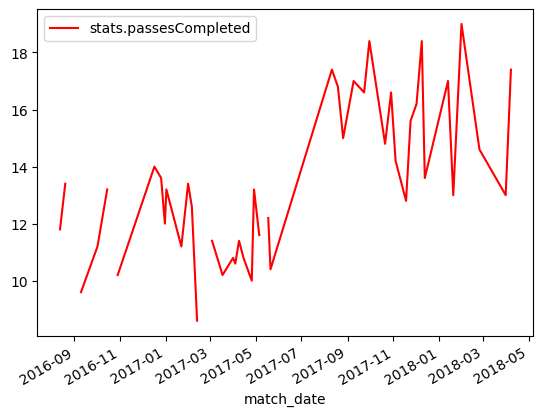

In [ ]:
rollingseries = time_df[1:50].rolling(window=5)
rollingmean = rollingseries.mean() #we can compute any statistical measure
rollingmean.plot(color="red")
plt.show()

In [ ]:
time_df

,stats.passesCompleted
match_date,
2017-01-14,11.0
2017-02-27,11.0
2016-10-22,12.0
2017-05-13,22.0
2016-08-27,9.0
...,...
2021-12-01,32.0
2022-04-02,16.0
2021-09-25,19.0


In [ ]:
time_df.sort_values(by='match_date',inplace=True)

In [ ]:
last_10 = time_df.tail(5)
time_df = time_df.iloc[:-5]


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Assuming 'df' is your DataFrame
# Make sure the 'match_date' column is in datetime format
# If not, convert it using df['match_date'] = pd.to_datetime(df['match_date'])

# Sort the DataFrame by 'match_date'
df = time_df.sort_values(by='match_date')

# Extract the 'passesCompleted' column as your target variable
target_variable = 'stats.passesCompleted'
y = df[target_variable].values.reshape(-1, 1)

# Normalize the data using Min-Max scaling
scaler = MinMaxScaler()
y_scaled = scaler.fit_transform(y)

# Function to prepare data for LSTM
def prepare_lstm_data(data, n_steps):
    X, y = [], []
    for i in range(len(data)):
        end_ix = i + n_steps
        if end_ix > len(data)-1:
            break
        seq_x, seq_y = data[i:end_ix], data[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

# Choose the number of time steps (you can adjust this)
n_steps = 3

# Prepare the data
X, y = prepare_lstm_data(y_scaled, n_steps)

# Reshape the input data for LSTM (samples, time steps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Fit the model
model.fit(X, y, epochs=200, verbose=1)

# Make predictions for the next layer
future_steps = 5  # adjust as needed
x_input = y_scaled[-n_steps:].reshape((1, n_steps, 1))
predictions = []

for _ in range(future_steps):
    yhat = model.predict(x_input, verbose=0)
    predictions.append(yhat[0, 0])
    x_input = np.append(x_input[:, 1:, :], yhat.reshape(1, 1, 1), axis=1)


# Inverse transform the predictions to the original scale
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# Display the predictions
print("Predictions for the next layer:")
print(predictions)


Epoch 1/200
7/7 [==============================] - 1s 4ms/step - loss: 0.1967
Epoch 2/200
7/7 [==============================] - 0s 4ms/step - loss: 0.1677
Epoch 3/200
7/7 [==============================] - 0s 4ms/step - loss: 0.1443
Epoch 4/200
7/7 [==============================] - 0s 4ms/step - loss: 0.1237
Epoch 5/200
7/7 [==============================] - 0s 4ms/step - loss: 0.1044
Epoch 6/200
7/7 [==============================] - 0s 3ms/step - loss: 0.0853
Epoch 7/200
7/7 [==============================] - 0s 4ms/step - loss: 0.0665
Epoch 8/200
7/7 [==============================] - 0s 4ms/step - loss: 0.0486
Epoch 9/200
7/7 [==============================] - 0s 4ms/step - loss: 0.0372
Epoch 10/200
7/7 [==============================] - 0s 4ms/step - loss: 0.0328
Epoch 11/200
7/7 [==============================] - 0s 4ms/step - loss: 0.0330
Epoch 12/200
7/7 [==============================] - 0s 3ms/step - loss: 0.0325
Epoch 13/200
7/7 [==============================] - 0s 4ms/st

In [ ]:
last_10['predictions'] = predictions

<ipython-input-41-381e0b0ac781>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_10['predictions'] = predictions


In [ ]:
last_10

,stats.passesCompleted,predictions
match_date,,
2022-05-08,16.0,18.153624
2022-05-11,18.0,17.272154
2022-05-15,0.0,18.229168
2022-05-19,18.0,19.391434
2022-05-22,24.0,20.081064


In [ ]:
time_df.tail(10)

,stats.passesCompleted
match_date,
2018-03-03,15.0
2018-03-10,6.0
2018-03-31,9.0
2018-04-07,15.0
2018-04-14,10.0
2018-09-22,19.0
2018-10-22,15.0
2018-11-10,18.0
2018-11-24,27.0


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f'R2 Score: {r2:.3f}')
print(f'RMSE: {rmse:.3f}')
print(f'MAE: {mae:.3f}')